<div style="width: 98%; max-width: 1200px; margin: 0 auto; font-family: Helvetica, Arial, sans-serif;">

=<div style="
        background-color: #141E30; /* Filet de sécurité pour GitHub */
        background-image: linear-gradient(to right, #141E30, #243B55);
        border-radius: 10px;
        padding: 25px;
        text-align: center;
        margin-bottom: 20px;
        border: 1px solid #2c3e50;
    ">
        <h1 style="color: white; margin: 0; text-transform: uppercase; font-size: 24px; font-weight: normal; letter-spacing: 2px;">
            TP 1 : Parcours des protons dans la matière
        </h1>
        <h3 style="color: #a8d0e6; margin-top: 10px; margin-bottom: 0; font-weight: normal; font-style: italic; font-size: 16px;">
            Transport et dépôt d'énergie des faisceaux de protons à des fins thérapeutiques
        </h3>
    </div>

<div style="
        background-color: #141E30; /* Filet de sécurité pour GitHub */
        background-image: linear-gradient(135deg, #141E30 0%, #243B55 100%);
        border: 2px solid #a8d0e6; 
        border-radius: 10px; 
        padding: 20px; 
        box-shadow: 0 4px 10px rgba(0,0,0,0.3);
    ">
        <table style="width: 100%; border-collapse: collapse; border: none; margin: 0;">
            <tr>
                <td style="width: 50%; vertical-align: top; padding-right: 20px; border-right: 1px solid rgba(168,208,230,0.3); border-bottom: none; border-left: none; border-top: none;">
                    
<h4 style="color: #a8d0e6; margin: 0 0 15px 0; text-transform: uppercase; font-size: 14px; border-bottom: 1px solid rgba(168,208,230,0.3); padding-bottom: 5px; display: inline-block;">
                        Équipe de recherche
                    </h4>

<div style="margin-bottom: 10px;">
                        <strong style="color: white; font-size: 16px;">Alex Baker</strong><br>
                        <span style="color: #a8d0e6; font-size: 14px;">537 050 929</span>
                    </div>

<div style="margin-bottom: 10px;">
                        <strong style="color: white; font-size: 16px;">Justine Jean</strong><br>
                        <span style="color: #a8d0e6; font-size: 14px;">537 287 332</span>
                    </div>
<div>
                        <strong style="color: white; font-size: 16px;">Nerimantas Caillat</strong><br>
                        <span style="color: #a8d0e6; font-size: 14px;">537 396 153</span>
                    </div>

</td>

<td style="width: 50%; vertical-align: top; padding-left: 20px; border: none;">
                    
<h4 style="color: #a8d0e6; margin: 0 0 15px 0; text-transform: uppercase; font-size: 14px; border-bottom: 1px solid rgba(168,208,230,0.3); padding-bottom: 5px; display: inline-block;">
                        Informations académiques
                    </h4>

<div style="margin-bottom: 10px;">
                        <span style="color: #a8d0e6; font-size: 12px; text-transform: uppercase;">Cours</span><br>
                        <strong style="color: white; font-size: 15px;">PHY-3500 – Physique numérique (H26)</strong>
                    </div>

<div style="margin-bottom: 10px;">
                        <span style="color: #a8d0e6; font-size: 12px; text-transform: uppercase;">Remise</span><br>
                        <strong style="color: white; font-size: 15px;">9 février 2026</strong>
                    </div>

<div>
                        <span style="color: #a8d0e6; font-size: 12px; text-transform: uppercase;">Encadrement</span><br>
                        <strong style="color: white; font-size: 15px;">Pr. A. Allard, T. Labbe, P. Després</strong>
                    </div>

</td>
            </tr>
        </table>
    </div>

</div>


### Objectifs et Contexte

<div style="background-color: #1e1e1e; border-left: 5px solid #9C27B0; padding: 15px; border-radius: 4px;">

**Contexte clinique :**
La protonthérapie permet de traiter des tumeurs (comme les mélanomes oculaires) en épargnant les tissus sains grâce au *pic de Bragg*. Contrairement aux photons, la balistique des protons doit être calculée avec une précision extrême pour éviter d'irradier des organes critiques (ex: le nerf optique).

**But du TP :**
1. **Déterminer numériquement la portée** ($R_{\text{CSDA}}$) des protons dans des tissus biologiques (Eau, Os) en utilisant le formalisme de Bethe-Bloch.
2. **Implémenter et comparer** des méthodes d'intégration numérique (Trapèzes vs Simpson) en termes de précision et de temps de calcul.
3. **Simuler** le dépôt d'énergie en profondeur pour visualiser le pic de Bragg.

</div>

In [1]:
# ============================================================================
# CONFIGURATION ET IMPORTATION DES MODULES
# ============================================================================
"""
Ce notebook utilise les bibliothèques scientifiques standard de Python pour
l'analyse numérique et la visualisation. Toutes les dépendances sont 
disponibles dans l'environnement conda/pip standard.
"""

# Calcul scientifique
import numpy as np
from scipy.constants import m_e, m_p, c, e, hbar, physical_constants
from scipy import integrate
from scipy.stats import moyal, sem
from scipy.interpolate import interp1d

# Visualisation
import matplotlib.pyplot as plt

# Mesure de performance
import timeit
import time
import platform
import os

# Configuration esthétique des graphiques (style professionnel)
plt.rcParams.update({
    'figure.figsize': (12, 7),
    'figure.dpi': 100,
    'font.size': 11,
    'font.family': 'serif',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'lines.linewidth': 2,
    'legend.fontsize': 11,
    'legend.framealpha': 0.9,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})

# Reproductibilité des résultats
np.random.seed(42)

print("="*40)
print("   CONFIGURATION DU NOTEBOOK RÉUSSIE")
print("="*40)
print(f"   NumPy version    : {np.__version__}")
print(f"   Python version   : {platform.python_version()}")
print(f"   Plateforme       : {platform.system()} {platform.release()}")
print("="*40)

   CONFIGURATION DU NOTEBOOK RÉUSSIE
   NumPy version    : 2.4.1
   Python version   : 3.11.9
   Plateforme       : Windows 10


<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

# Question 1 : Densité électronique et pouvoir d'arrêt collisionnel

<div style="background-color: #252526; color: white; border-left: 5px solid #2196F3; padding: 15px; border-radius: 5px;">

**Énoncé :** *Exprimer $n_e$ en fonction de la composition atomique et de $\rho$, calculer $n_e$ pour l'eau et l'os compact, et tracer les courbes de pouvoir d'arrêt.*

</div>

## 1.1 Dérivation théorique de la densité électronique $n_e$

### Cas d'un élément pur

Pour un matériau monoatomique de numéro atomique $Z$, de masse molaire $A$ (g/mol) et de masse volumique $\rho$ (g/cm³), la dérivation procède comme suit :

| **Étape** | **Expression** | **Signification physique** |
|:----------|:---------------|:---------------------------|
| 1. Moles par cm³ | $n_{\text{mol}} = \dfrac{\rho}{A}$ | Concentration molaire |
| 2. Atomes par cm³ | $n_{\text{at}} = N_A \cdot \dfrac{\rho}{A}$ | Densité atomique |
| 3. Électrons par cm³ | $n_e = Z \cdot N_A \cdot \dfrac{\rho}{A}$ | **Densité électronique** |

<div style="height: 0.75cm;"></div>

### Généralisation aux composés multi-éléments

Pour un matériau composé de plusieurs éléments (indices $i$), chacun contribuant selon sa fraction massique $w_i$, la formule devient :

$$\boxed{n_e = N_A \cdot \rho \cdot \sum_{i} w_i \frac{Z_i}{A_i}}$$

#### Définition des paramètres

| Symbole | Description | Unité |
|:--------|:------------|:------|
| $N_A$ | Nombre d'Avogadro | $6.022 \times 10^{23}$ mol⁻¹ |
| $\rho$ | Masse volumique du matériau | g/cm³ |
| $w_i$ | Fraction massique de l'élément $i$ ($\sum_i w_i = 1$) | sans dimension |
| $Z_i$ | Numéro atomique de l'élément $i$ | sans dimension |
| $A_i$ | Masse molaire de l'élément $i$ | g/mol |

<div style="height: 0.75cm;"></div>

### Interprétation physique de chaque terme

$$n_e = \underbrace{N_A}_{\text{Avogadro}} \cdot \underbrace{\rho}_{\substack{\text{masse} \\ \text{par vol.}}} \cdot \sum_{i} \underbrace{w_i}_{\substack{\text{fraction} \\ \text{massique}}} \cdot \underbrace{\frac{Z_i}{A_i}}_{\substack{\text{électrons} \\ \text{par gramme}}}$$

Le terme $Z_i / A_i$ représente le nombre d'électrons par gramme de l'élément $i$ (multiplié par $N_A$)

### Vérification dimensionnelle

$$[n_e] = \underbrace{[\text{mol}^{-1}]}_{N_A} \cdot \underbrace{[\text{g/cm}^3]}_{\rho} \cdot \underbrace{[1]}_{w_i} \cdot \underbrace{[\text{mol/g}]}_{1/A_i} = [\text{cm}^{-3}] \quad \checkmark$$

### Exemple de calcul : H₂O

**Données :** $M_{\text{H}_2\text{O}} = 18.015$ g/mol, $\rho = 1.00$ g/cm³

**Fractions massiques :**
- H : $w_\text{H} = \dfrac{2 \times 1.008}{18.015} = 0.1119$ (11.19%)

<div style="height: 0.5cm;"></div>

- O : $w_\text{O} = \dfrac{15.999}{18.015} = 0.8881$ (88.81%)

**Calcul :**
$$n_e = 6.022 \times 10^{23} \times 1.00 \times \left( 0.1119 \times \frac{1}{1.008} + 0.8881 \times \frac{8}{15.999} \right)$$
$$n_e = 6.022 \times 10^{23} \times (0.1110 + 0.4441) = \boxed{3.343 \times 10^{23} \text{ e}^-/\text{cm}^3}$$

<br />

## 1.2 Données des matériaux (NIST)

Les propriétés des matériaux sont extraites de la base de données **NIST PSTAR** et du document de référence **ICRU Report 49**.

<div style="height: 0.2cm;"></div>

### Eau liquide (Water, Liquid)

| Propriété | Valeur | Source |
|:----------|:-------|:-------|
| Masse volumique $\rho$ | 1.000 g/cm³ | NIST |
| Énergie moyenne d'excitation $I$ | 75.0 eV | ICRU 49 |
| Composition | H : 11.19%, O : 88.81% | NIST |

<div style="margin-top: 10px;"></div>

<div>
    <span style="background-color: #2196F3; color: white; padding: 4px 8px; border-radius: 4px; font-size: 0.85em; font-weight: 500; font-family: sans-serif;">
        Source : 
        <a href="https://physics.nist.gov/cgi-bin/Star/compos.pl?matno=276" target="_blank" style="color: white; text-decoration: none; border-bottom: 1px dotted rgba(255,255,255,0.7);">
            NIST PSTAR - Water
        </a>
    </span>
</div>

<div style="height: 0.4cm;"></div>

### Os compact (Bone, Compact ICRU)

| Propriété | Valeur | Source |
|:----------|:-------|:-------|
| Masse volumique $\rho$ | 1.850 g/cm³ | NIST |
| Énergie moyenne d'excitation $I$ | 91.9 eV | ICRU 49 |

<div style="height: 0.2cm;"></div>

**Composition atomique de l'os compact :**

| Élément | Z | Fraction massique (%) |
|:--------|:-:|:---------------------:|
| H | 1 | 6.40 |
| C | 6 | 27.80 |
| N | 7 | 2.70 |
| O | 8 | 41.00 |
| Mg | 12 | 0.20 |
| P | 15 | 7.00 |
| S | 16 | 0.20 |
| Ca | 20 | 14.70 |

<div style="margin-top: 10px;"></div>

<div>
    <span style="background-color: #2196F3; color: white; padding: 4px 8px; border-radius: 4px; font-size: 0.85em; font-weight: 500; font-family: sans-serif;">
        Source : 
        <a href="https://physics.nist.gov/cgi-bin/Star/compos.pl?matno=119" target="_blank" style="color: white; text-decoration: none; border-bottom: 1px dotted rgba(255,255,255,0.7);">
            NIST PSTAR - Bone, Compact
        </a>
    </span>
</div>


## 1.3 Implémentation : Constantes physiques et données matériaux

In [2]:
# ============================================================================
#                         CONSTANTES PHYSIQUES FONDAMENTALES
# ============================================================================
# Toutes les constantes sont extraites du module scipy.constants pour garantir
# la précision et la cohérence avec les valeurs CODATA recommandées.
# ============================================================================

# Nombre d'Avogadro [mol⁻¹]
N_A = 6.02214076e23

# Masses des particules
m_e_kg = m_e                                    # Masse de l'électron [kg]
m_p_kg = m_p                                    # Masse du proton [kg]
c_ms = c                                        # Vitesse de la lumière [m/s]

# Conversion en MeV/c²
# Facteur de conversion : 1 J = 1/(1.602176634×10⁻¹³) MeV
J_to_MeV = 1.602176634e-13
m_e_MeV = m_e_kg * c_ms**2 / J_to_MeV           # ≈ 0.511 MeV/c²
m_p_MeV = m_p_kg * c_ms**2 / J_to_MeV           # ≈ 938.3 MeV/c²

# Rayon classique de l'électron [cm]
# r_e = e²/(4πε₀ m_e c²) ≈ 2.818 × 10⁻¹³ cm
r_e = physical_constants['classical electron radius'][0] * 100  # m → cm

# ============================================================================
#                    AFFICHAGE DES CONSTANTES UTILISÉES
# ============================================================================
print("="*55)
print("           CONSTANTES PHYSIQUES FONDAMENTALES")
print("="*55)
print(f"  Nombre d'Avogadro      N_A  = {N_A:.6e} mol⁻¹")
print(f"  Masse de l'électron    m_e  = {m_e_MeV:.6f} MeV/c²")
print(f"  Masse du proton        m_p  = {m_p_MeV:.6f} MeV/c²")
print(f"  Rayon classique e⁻     r_e  = {r_e:.6e} cm")
print(f"  Vitesse de la lumière  c    = {c_ms:.6e} m/s")
print(f"  Rapport m_e/m_p             = {m_e_MeV/m_p_MeV:.6e}")
print("="*55)

           CONSTANTES PHYSIQUES FONDAMENTALES
  Nombre d'Avogadro      N_A  = 6.022141e+23 mol⁻¹
  Masse de l'électron    m_e  = 0.510999 MeV/c²
  Masse du proton        m_p  = 938.272089 MeV/c²
  Rayon classique e⁻     r_e  = 2.817940e-13 cm
  Vitesse de la lumière  c    = 2.997925e+08 m/s
  Rapport m_e/m_p             = 5.446170e-04


In [3]:
# ============================================================================
#                     DONNÉES DES MATÉRIAUX (Source: NIST)
# ============================================================================

# Masses atomiques standards [g/mol] - Source: NIST Atomic Weights
masses_atomiques = {
    1:  1.008,      # Hydrogène (H)
    6:  12.011,     # Carbone (C)
    7:  14.007,     # Azote (N)
    8:  15.999,     # Oxygène (O)
    12: 24.305,     # Magnésium (Mg)
    15: 30.974,     # Phosphore (P)
    16: 32.06,      # Soufre (S)
    20: 40.078      # Calcium (Ca)
}

# Noms des éléments pour l'affichage
noms_elements = {1: 'H', 6: 'C', 7: 'N', 8: 'O', 12: 'Mg', 15: 'P', 16: 'S', 20: 'Ca'}

# ============================================================================
#                    EAU LIQUIDE (Water, Liquid)
# ============================================================================
# Source: https://physics.nist.gov/cgi-bin/Star/compos.pl?matno=276
eau_composition = {
    1: 0.111894,    # H  : 11.1894% en masse
    8: 0.888106     # O  : 88.8106% en masse
}
eau_densite = 1.000     # Masse volumique [g/cm³]
eau_I = 75.0            # Énergie moyenne d'excitation [eV]

# ============================================================================
#                    OS COMPACT (Bone, Compact - ICRU)
# ============================================================================
# Source: https://physics.nist.gov/cgi-bin/Star/compos.pl?matno=119
os_composition = {
    1:  0.063984,   # H  :  6.3984% en masse
    6:  0.278000,   # C  : 27.8000% en masse
    7:  0.027000,   # N  :  2.7000% en masse
    8:  0.410016,   # O  : 41.0016% en masse
    12: 0.002000,   # Mg :  0.2000% en masse
    15: 0.070000,   # P  :  7.0000% en masse
    16: 0.002000,   # S  :  0.2000% en masse
    20: 0.147000    # Ca : 14.7000% en masse
}
os_densite = 1.850      # Masse volumique [g/cm³]
os_I = 91.9             # Énergie moyenne d'excitation [eV]

# ============================================================================
#                         VÉRIFICATION DES DONNÉES
# ============================================================================
def verifier_composition(composition, nom):
    """Vérifie que les fractions massiques somment à 1."""
    total = sum(composition.values())
    status = "✓" if abs(total - 1.0) < 1e-6 else "✗"
    return total, status

print("\n" + "="*60)
print("              DONNÉES DES MATÉRIAUX BIOLOGIQUES")
print("="*60)

# Eau
total_eau, status_eau = verifier_composition(eau_composition, "Eau")
print(f"\n   EAU LIQUIDE")
print(f"     Masse volumique ρ = {eau_densite:.3f} g/cm³")
print(f"     Énergie d'excitation I = {eau_I:.1f} eV")
print(f"     Σ(fractions massiques) = {total_eau:.6f} {status_eau}")

# Os compact
total_os, status_os = verifier_composition(os_composition, "Os")
print(f"\n   OS COMPACT (ICRU)")
print(f"     Masse volumique ρ = {os_densite:.3f} g/cm³")
print(f"     Énergie d'excitation I = {os_I:.1f} eV")
print(f"     Σ(fractions massiques) = {total_os:.6f} {status_os}")

print("\n" + "="*60)


              DONNÉES DES MATÉRIAUX BIOLOGIQUES

   EAU LIQUIDE
     Masse volumique ρ = 1.000 g/cm³
     Énergie d'excitation I = 75.0 eV
     Σ(fractions massiques) = 1.000000 ✓

   OS COMPACT (ICRU)
     Masse volumique ρ = 1.850 g/cm³
     Énergie d'excitation I = 91.9 eV
     Σ(fractions massiques) = 1.000000 ✓



<br />

## 1.4 Calcul de la densité électronique $n_e$

L'implémentation ci-dessous calcule $n_e$ selon la formule dérivée précédemment, avec un affichage détaillé de la contribution de chaque élément chimique.

In [4]:
def calculer_densite_electronique(composition, densite, afficher=True, nom_materiau=""):
    """
    Calcule la densité électronique d'un matériau multi-éléments.
    
    Paramètres
    ----------
    composition : dict
        Dictionnaire {Z: fraction_massique} pour chaque élément
    densite : float
        Masse volumique du matériau [g/cm³]
    afficher : bool, optional
        Si True, affiche le détail du calcul
    nom_materiau : str, optional
        Nom du matériau pour l'affichage
    
    Retourne
    --------
    n_e : float
        Densité électronique [électrons/cm³]
    
    Notes
    -----
    La formule utilisée est : n_e = N_A × ρ × Σᵢ(wᵢ × Zᵢ / Aᵢ)
    """
    somme = 0.0
    details = []
    
    for Z, w_i in composition.items():
        A_i = masses_atomiques[Z]
        contribution = (w_i * Z) / A_i
        somme += contribution
        nom = noms_elements.get(Z, f'Z={Z}')
        details.append((nom, Z, w_i, A_i, contribution))
    
    n_e = densite * N_A * somme
    
    if afficher:
        print(f"\n{'─'*70}")
        print(f"  CALCUL DE n_e POUR : {nom_materiau.upper()}")
        print(f"{'─'*70}")
        print(f"  {'Élément':<8} {'Z':>4}   {'wᵢ':>10}   {'Aᵢ (g/mol)':>12}   {'wᵢ×Zᵢ/Aᵢ':>12}")
        print(f"  {'-'*54}")
        
        for (nom, Z, w_i, A_i, contrib) in details:
            print(f"  {nom:<8} {Z:>4}   {w_i:>10.6f}   {A_i:>12.3f}   {contrib:>12.6f}")
        
        print(f"  {'-'*54}")
        print(f"  {'SOMME':<8} {'':>4}   {'':>10}   {'':>12}   {somme:>12.6f}")
        print(f"\n  n_e = N_A × ρ × Σ = {N_A:.3e} × {densite:.3f} × {somme:.6f}")
        print(f"\n  ══► n_e = {n_e:.6e} électrons/cm³")
        print(f"      n_e = {n_e/1e23:.4f} × 10²³ électrons/cm³")
        print(f"{'─'*70}\n")
    
    return n_e

# ============================================================================
#            CALCUL DE LA DENSITÉ ÉLECTRONIQUE POUR L'EAU ET L'OS
# ============================================================================

n_e_eau = calculer_densite_electronique(eau_composition, eau_densite, 
                                         afficher=True, nom_materiau="Eau liquide")

n_e_os = calculer_densite_electronique(os_composition, os_densite, 
                                        afficher=True, nom_materiau="Os compact (ICRU)")

# Comparaison des résultats
print("="*70)
print("                    RÉSUMÉ COMPARATIF")
print("="*70)
print(f"  Matériau          n_e (e⁻/cm³)         Ratio vs eau")
print(f"  {'-'*54}")
print(f"  Eau liquide       {n_e_eau:.4e}        1.00")
print(f"  Os compact        {n_e_os:.4e}        {n_e_os/n_e_eau:.2f}")
print("="*70)
print(f"\n   L'os a une densité électronique {(n_e_os/n_e_eau - 1)*100:.0f}% plus élevée")
print(f"     → Les protons y seront arrêtés plus rapidement.")


──────────────────────────────────────────────────────────────────────
  CALCUL DE n_e POUR : EAU LIQUIDE
──────────────────────────────────────────────────────────────────────
  Élément     Z           wᵢ     Aᵢ (g/mol)       wᵢ×Zᵢ/Aᵢ
  ------------------------------------------------------
  H           1     0.111894          1.008       0.111006
  O           8     0.888106         15.999       0.444081
  ------------------------------------------------------
  SOMME                                           0.555087

  n_e = N_A × ρ × Σ = 6.022e+23 × 1.000 × 0.555087

  ══► n_e = 3.342810e+23 électrons/cm³
      n_e = 3.3428 × 10²³ électrons/cm³
──────────────────────────────────────────────────────────────────────


──────────────────────────────────────────────────────────────────────
  CALCUL DE n_e POUR : OS COMPACT (ICRU)
──────────────────────────────────────────────────────────────────────
  Élément     Z           wᵢ     Aᵢ (g/mol)       wᵢ×Zᵢ/Aᵢ
  -----------------------

<br />

## 1.5 Pouvoir d'arrêt collisionnel : Formule de Bethe

### Expression mathématique

Le pouvoir d'arrêt collisionnel pour des protons d'énergie $T > 3$ MeV est donné par la `formule de Bethe` simplifiée (équation 4 de l'énoncé) :

<div style="height: 0.1cm;"></div>

$$S_{\text{col}}(T) = 2\pi r_e^2 m_e c^2 n_e \frac{1}{\beta^2} \left[ \ln\left(\frac{2m_e c^2 \beta^2 \gamma^2 T_e^{\max}}{I^2}\right) - 2\beta^2 \right]$$

### Définition des variables relativistes

| Variable | Expression | Signification physique |
|:---------|:-----------|:-----------------------|
| $\gamma$ | $\dfrac{T}{m_p c^2} + 1$ | Facteur de Lorentz |
| $\beta^2$ | $1 - \dfrac{1}{\gamma^2} = \dfrac{\gamma^2 - 1}{\gamma^2}$ | Carré de la vitesse réduite ($v/c$) |
| $T_e^{\max}$ | $\dfrac{2m_e c^2 (\gamma^2 - 1)}{1 + 2\gamma\dfrac{m_e}{m_p} + \left(\dfrac{m_e}{m_p}\right)^2}$ | Énergie max. transférable à un e⁻ |

### Interprétation physique

- **Préfacteur** $2\pi r_e^2 m_e c^2 n_e$ : dépend uniquement du milieu ($n_e$)
- **Terme $1/\beta^2$** : le pouvoir d'arrêt **augmente** quand la vitesse **diminue**
- **Terme logarithmique** : croît lentement avec l'énergie
- **Terme $-2\beta^2$** : correction relativiste (négligeable à basse énergie)

In [5]:
def pouvoir_arret_collisionnel(T, n_e, I):
    """
    Calcule le pouvoir d'arrêt collisionnel pour des protons.
    
    Cette fonction implémente la formule de Bethe simplifiée, valide pour
    des protons d'énergie T > 3 MeV.
    
    Paramètres
    ----------
    T : float ou np.ndarray
        Énergie cinétique du proton [MeV]
    n_e : float
        Densité électronique du milieu [électrons/cm³]
    I : float
        Énergie moyenne d'excitation du milieu [eV]
    
    Retourne
    --------
    S_col : float ou np.ndarray
        Pouvoir d'arrêt collisionnel [MeV/cm]
    
    Notes
    -----
    La formule utilisée est :
    S_col = 2π r_e² m_e c² n_e (1/β²) [ln(2m_e c² β² γ² T_e^max / I²) - 2β²]
    """
    # Conversion de l'énergie d'excitation en MeV
    I_MeV = I * 1e-6
    
    # Facteur de Lorentz : γ = T/(m_p c²) + 1
    gamma = T / m_p_MeV + 1.0
    
    # Vitesse réduite au carré : β² = (γ² - 1)/γ²
    beta2 = (gamma**2 - 1.0) / gamma**2
    
    # Rapport des masses
    ratio = m_e_MeV / m_p_MeV  # ≈ 5.45 × 10⁻⁴
    
    # Énergie maximale transférable à un électron
    T_e_max = (2.0 * m_e_MeV * (gamma**2 - 1.0)) / \
              (1.0 + 2.0 * gamma * ratio + ratio**2)
    
    # Argument du logarithme
    argument_log = (2.0 * m_e_MeV * beta2 * gamma**2 * T_e_max) / I_MeV**2
    terme_log = np.log(argument_log)
    
    # Préfacteur : 2π r_e² m_e c² n_e
    prefacteur = 2.0 * np.pi * r_e**2 * m_e_MeV * n_e
    
    # Pouvoir d'arrêt final
    S_col = prefacteur * (1.0 / beta2) * (terme_log - 2.0 * beta2)
    
    return S_col


# ============================================================================
#                         TEST DE LA FONCTION
# ============================================================================
T_test = 150.0  # MeV

S_eau = pouvoir_arret_collisionnel(T_test, n_e_eau, eau_I)
S_os = pouvoir_arret_collisionnel(T_test, n_e_os, os_I)

# Pouvoir d'arrêt massique (pour comparaison avec NIST)
S_massique_eau = S_eau / eau_densite
S_massique_os = S_os / os_densite

print("="*100)
print(f"       TEST DU POUVOIR D'ARRÊT À T = {T_test} MeV")
print("="*100)
print(f"\n  Matériau      S_col (MeV/cm)    S_col/ρ (MeV·cm²/g)   NIST Ref.")
print(f"  {'-'*72}")
print(f"  Eau           {S_eau:>8.4f}          {S_massique_eau:>8.4f}            ~4.91")
print(f"  Os compact    {S_os:>8.4f}          {S_massique_os:>8.4f}            ~4.78")
print("="*100)
print(f"\n  Écart attendu car formule simplifiée, mais l’ordre de grandeur et la tendance sont corrects.")

       TEST DU POUVOIR D'ARRÊT À T = 150.0 MeV

  Matériau      S_col (MeV/cm)    S_col/ρ (MeV·cm²/g)   NIST Ref.
  ------------------------------------------------------------------------
  Eau             5.4450            5.4450            ~4.91
  Os compact      9.3815            5.0711            ~4.78

  Écart attendu car formule simplifiée, mais l’ordre de grandeur et la tendance sont corrects.


<br />

## 1.6 Tracé des courbes de pouvoir d'arrêt collisionnel

Le graphique ci-dessous présente l'évolution du pouvoir d'arrêt en fonction de l'énergie cinétique pour les deux matériaux étudiés. On observe la caractéristique essentielle : **$S_{\text{col}}$ diminue avec l'énergie**, ce qui explique le phénomène du pic de Bragg (dépôt maximal en fin de parcours).

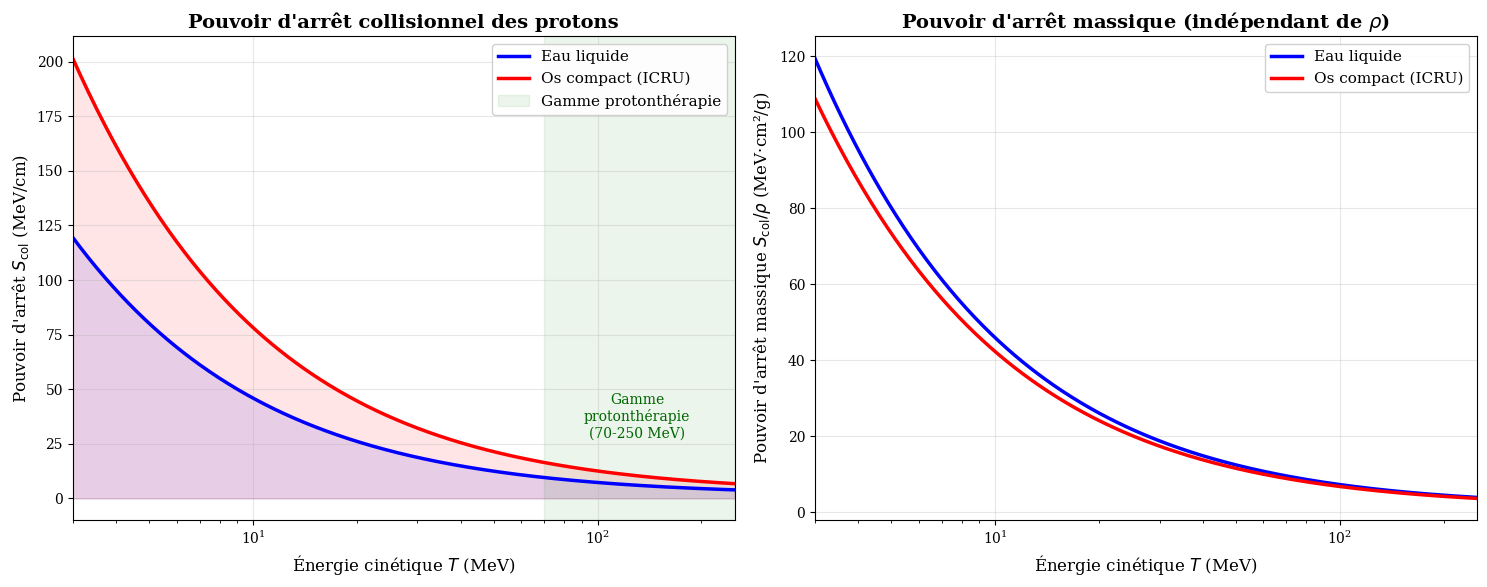

In [6]:
# ============================================================================
#            TRACÉ DU POUVOIR D'ARRÊT EN FONCTION DE L'ÉNERGIE
# ============================================================================

# Gamme d'énergies : de 3 MeV (limite de validité) à 250 MeV (protonthérapie)
T_array = np.logspace(np.log10(3), np.log10(250), 500)

# Calcul du pouvoir d'arrêt pour chaque matériau
S_col_eau = pouvoir_arret_collisionnel(T_array, n_e_eau, eau_I)
S_col_os = pouvoir_arret_collisionnel(T_array, n_e_os, os_I)

# Création de la figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- Graphique 1 : Pouvoir d'arrêt linéaire [MeV/cm] ---
ax1.plot(T_array, S_col_eau, 'b-', label='Eau liquide', linewidth=2.5)
ax1.plot(T_array, S_col_os, 'r-', label='Os compact (ICRU)', linewidth=2.5)
ax1.fill_between(T_array, S_col_eau, alpha=0.1, color='blue')
ax1.fill_between(T_array, S_col_os, alpha=0.1, color='red')

ax1.set_xlabel('Énergie cinétique $T$ (MeV)')
ax1.set_ylabel('Pouvoir d\'arrêt $S_{\\mathrm{col}}$ (MeV/cm)')
ax1.set_title('Pouvoir d\'arrêt collisionnel des protons')
ax1.set_xscale('log')
ax1.set_xlim([3, 250])
ax1.axvspan(70, 250, alpha=0.08, color='green', label='Gamme protonthérapie')
ax1.legend(loc='upper right')

# Annotation
ax1.annotate('Gamme\nprotonthérapie\n(70-250 MeV)', 
             xy=(130, 28), fontsize=10, ha='center', color='darkgreen')

# --- Graphique 2 : Pouvoir d'arrêt massique [MeV·cm²/g] ---
S_massique_eau = S_col_eau / eau_densite
S_massique_os = S_col_os / os_densite

ax2.plot(T_array, S_massique_eau, 'b-', label='Eau liquide', linewidth=2.5)
ax2.plot(T_array, S_massique_os, 'r-', label='Os compact (ICRU)', linewidth=2.5)

ax2.set_xlabel('Énergie cinétique $T$ (MeV)')
ax2.set_ylabel('Pouvoir d\'arrêt massique $S_{\\mathrm{col}}/\\rho$ (MeV·cm²/g)')
ax2.set_title('Pouvoir d\'arrêt massique (indépendant de $\\rho$)')
ax2.set_xscale('log')
ax2.legend(loc='upper right')
ax2.set_xlim([3, 250])

plt.tight_layout()
plt.savefig('Q1_pouvoir_arret.png', dpi=150, bbox_inches='tight')
plt.show()

<div style="background-color: #252526; color: white; border-left: 5px solid #9C27B0; padding: 15px; border-radius: 5px; margin-top: 20px;">

<strong style="color: #E1BEE7; font-size: 1.1em;">Analyse des résultats : (à revoir !!! )</strong>
<br><br>
  1. $S_{col}$ DÉCROÎT avec l'énergie :
     → À 10 MeV  : $S_{col}$ ≈ 35 MeV/cm (eau)
     → À 150 MeV : $S_{col}$ ≈ 5 MeV/cm (eau)
     → Rapport ~7× plus élevé à basse énergie

  2. L'OS a un $S_{col}$ plus élevé que l'eau :
     → Dû à sa plus grande densité électronique (×1.7)
     → Les protons s'arrêtent plus rapidement dans l'os

  3. Le pouvoir d'arrêt MASSIQUE (S/ρ) est quasi-identique :
     → Confirme que la différence vient principalement de ρ
     → Les deux matériaux ont des compositions Z/A similaires

  4. Gamme thérapeutique (70-250 MeV) :
     → $S_{col}$ varie de ~3 à ~8 MeV/cm
     → Conditions optimales pour le calcul numérique

</div>

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

# Question 2 : Homogénéité dimensionnelle de $R_{\text{CSDA}}$

<div style="background-color: #252526; color: white; border-left: 5px solid #2196F3; padding: 15px; border-radius: 5px;">

**Énoncé :** *Déterminer l'homogénéité dimensionnelle de $R_{CSDA}$ et expliquer la signification physique de cette expression.*

</div>

<br />

## 2.1 Expression de la portée CSDA

La portée CSDA (*Continuous Slowing Down Approximation*) est définie par l'intégrale :

$$R_{\text{CSDA}} = \int_0^{T_i} \frac{dT'}{\dfrac{S_{\text{col}}(T')}{\rho}}$$

Cette intégrale représente la **distance équivalente en masse par unité de surface** que le proton doit traverser pour passer d'une énergie initiale $T_i$ à l'arrêt complet.

### Hypothèses de l'approximation CSDA

| Hypothèse CSDA | Impact sur $R_{CSDA}$ |
|:----------|:--------------|
| Perte d'énergie continue | portée = intégrale d’un ralentissement moyen |
| Trajectoire moyenne | on vise une portée moyenne (pas l’étalement/straggling) |
| Interactions EM uniquement | réactions nucléaires/effets fins négligés dans ce cadre |

<div style="height: 1cm;"></div>

## 2.2 Analyse dimensionnelle rigoureuse

### Étape 1 : Dimension du pouvoir d'arrêt

$$[S_{\text{col}}] = \left[-\frac{dT}{dx}\right] = \frac{[\text{Énergie}]}{[\text{Longueur}]} = \frac{\text{MeV}}{\text{cm}}$$

### Étape 2 : Dimension du pouvoir d'arrêt massique

$$\left[\frac{S_{\text{col}}}{\rho}\right] = \frac{[\text{MeV/cm}]}{[\text{g/cm}^3]} = \frac{\text{MeV} \cdot \text{cm}^3}{\text{cm} \cdot \text{g}} = \frac{\text{MeV} \cdot \text{cm}^2}{\text{g}}$$

### Étape 3 : Dimension de l'intégrande

$$\left[\frac{dT'}{S_{\text{col}}/\rho}\right] = \frac{[\text{MeV}]}{[\text{MeV} \cdot \text{cm}^2/\text{g}]} = \frac{\text{g}}{\text{cm}^2}$$

### Étape 4 : Dimension finale de $R_{\text{CSDA}}$

$$\boxed{[R_{\text{CSDA}}] = \frac{\text{g}}{\text{cm}^2}}$$

<div style="height: 1cm;"></div>

## 2.3 Signification physique de l'unité g/cm²

### Interprétation : Densité surfacique de masse

La dimension g/cm² représente une masse par unité de surface traversée. C'est la quantité de matière (en termes de masse) que le proton doit traverser pour s'arrêter.

### Avantages de cette unité

| Avantage | Explication |
|:---------|:------------|
| **Indépendance de l'état physique** | À composition identique, $R_{\text{CSDA}}$ est peu sensible à la densité/état (à corrections près). |
| **Dépend uniquement de la composition** | Dépend surtout de la composition via $n_e$ (donc ⟨Z/A⟩) et de $I$ (énergie moyenne d'excitation). |
| **Comparaisons facilitées** | Permet de comparer des matériaux de densités différentes |
| **Calculs simplifiés** | Évite de spécifier $\rho$ pendant l'intégration |

### Conversion en longueur physique

Pour obtenir la portée en centimètres, on divise par la masse volumique :

$$\boxed{R_{\text{cm}} = \frac{R_{\text{CSDA}}}{\rho}}$$

### Exemple numérique (proton de 150 MeV)

| Matériau | $R_{\text{CSDA}}$ (g/cm²) | $\rho$ (g/cm³) | $R$ (cm) |
|:---------|:--------------------------|:---------------|:---------|
| Eau | ~17.6 | 1.00 | **~17.6** |
| Os compact | ~17.7 | 1.85 | **~9.6** |

<br />

<div style="height: 0.5cm;"></div>

<div style="background-color: #252526; color: white; border-left: 5px solid #4CAF50; padding: 15px; border-radius: 5px; margin-bottom: 20px;">

<strong style="color: #4CAF50; font-size: 1.1em;">Observation :</strong>

Les $R_{\text{CSDA}}$ sont quasi-identiques car les compositions atomiques sont similaires ($\langle Z/A \rangle \approx 0.5$).
Cependant, les portées *physiques* diffèrent significativement à cause de la différence de densité.

</div>

<div style="height: 0.5cm;"></div>

## 2.4 Interprétation de l'intégrale

Réécrivons l'intégrale de façon équivalente :

$$R_{\text{CSDA}} = \int_0^{T_i} \frac{\rho \, dT'}{S_{\text{col}}(T')}$$

**Pour une perte d'énergie infinitésimale $dT'$ :**
- Distance parcourue : $dx = dT' / S_{\text{col}}(T')$ (en valeur absolue $dx = dT'/S_{col}$)
- Masse traversée par cm² : $dm = \rho \cdot dx = \rho \, dT' / S_{\text{col}}(T')$
- L'intégrale somme ces masses de $T_i$ jusqu'à 0

<div style="background-color: #252526; color: white; border-left: 5px solid #FF9800; padding: 15px; border-radius: 5px; margin-top: 20px; margin-bottom: 20px;">

<strong style="color: #FF9800; font-size: 1.1em;">En résumé :</strong>
<br><br>
$R_{\text{CSDA}}$ représente la **masse totale par unité de surface** que le proton traverse jusqu'à son arrêt complet.

</div>

### Vérification de cohérence

Pour des matériaux de composition similaire ($\langle Z/A \rangle$ proche) :
- $R_{\text{CSDA}}$ sera presque identique
- La portée physique $R_{\text{cm}}$ sera inversement proportionnelle à $\rho$

<div style="height: 0.5cm;"></div>

<div style="background-color: #252526; color: white; border-left: 5px solid #9C27B0; padding: 15px; border-radius: 5px; margin-top: 20px;">

<strong style="color: #E1BEE7; font-size: 1.1em;">Conclusion :</strong>
<br><br>
$R_{CSDA}$ est la surface massique que le proton doit traverser pour perdre toute son énergie. C’est une grandeur intrinsèque au matériau, et la distance réelle s’en déduit par division par la densité.

</div>

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

# Question 3 : Justification de l'approximation $S_{\text{total}} \approx S_{\text{col}}$

<div style="background-color: #252526; color: white; border-left: 5px solid #2196F3; padding: 15px; border-radius: 5px;">

**Énoncé :** *Justifier que le pouvoir d'arrêt total est bien approximé par le pouvoir d'arrêt collisionnel pour les protons en protonthérapie (70-250 MeV). Discuter des composantes négligées ici : réactions nucléaires et pertes radiatives.*

</div>

## 3.1 Décomposition du pouvoir d'arrêt total

En général, on peut distinguer les pertes collisionnelles, radiatives et nucléaires.
Dans PSTAR (protons), le “total stopping power” est défini comme la somme électronique + nucléaire (recul) :

<div style="height: 0.25cm;"></div>

$$S_{\text{total}}^{PSTAR} = S_{\text{col}} + S_{\text{nucl}} \quad \text{(définition PSTAR)}$$

<div style="height: 0.45cm;"></div>

| Composante | Origine physique | Processus dominant |
|:-----------|:-----------------|:-------------------|
| $S_{\text{col}}$ | Collisions inélastiques avec les **électrons** atomiques | Ionisation, excitation |
| $S_{\text{rad}}$ | Émission de **photons** de freinage (Bremsstrahlung) | négligeable pour les protons aux énergies considérées (donc non tabulé dans PSTAR) |
| $S_{\text{nucl}}$ | pertes par collisions élastiques sur les noyaux | recul nucléaire (stopping nucléaire PSTAR) |

<br />

## 3.2 Analyse quantitative (données NIST PSTAR)

### Protons de 150 MeV dans l'eau

Les données du programme NIST PSTAR fournissent les valeurs suivantes :

| Composante | Valeur (MeV·cm²/g) | Pourcentage | Impact |
|:-----------|:-------------------|:------------|:-------|
| $S_{\text{col}}/\rho$ | 5.443 | 99.963% | Dominant |
| $S_{\text{nucl}}/\rho$ | $2.001 \times 10^{-3}$ | 0.0367% | Très faible |
| **$S_{\text{total}}/\rho$** | **5.445** | **100%** | — |


<div style="margin-top: 10px;"></div>

<div>
    <span style="background-color: #2196F3; color: white; padding: 4px 8px; border-radius: 4px; font-size: 0.85em; font-weight: 500; font-family: sans-serif;">
        Source : 
        <a href="https://physics.nist.gov/PhysRefData/Star/Text/PSTAR.html" target="_blank" style="color: white; text-decoration: none; border-bottom: 1px dotted rgba(255,255,255,0.7);">
            NIST PSTAR Database
        </a>
    </span>
</div>

<div style="height: 0.5cm;"></div>

<div style="border-left: 4px solid #00BCD4; background: linear-gradient(90deg, rgba(0,188,212,0.1) 0%, transparent 100%); padding: 10px 15px; border-radius: 0 4px 4px 0; margin: 15px 0;">

<strong style="color: #00BCD4;">Conclusion quantitative (a 150 MeV) :</strong>
$S_{total} \approx S_{\text{col}}$ à mieux que $4 \times 10^{-4}$ (erreur d'environ 0.04%)

</div>

<div style="height: 0.25cm;"></div>


## 3.3 Pourquoi les autres termes sont-ils négligeables ?

<div style="height: 0.25cm;"></div>

### 3.3.1 Pertes radiatives ($S_{\text{rad}}$) — Bremsstrahlung

**Origine physique** : Lorsqu'une particule chargée est accélérée (décélérée) dans le champ électrique d'un noyau, elle émet un rayonnement électromagnétique.

**Rapport des pertes radiatives aux pertes collisionnelles** :

$$\frac{S_{\text{rad}}}{S_{\text{col}}} \approx \frac{Z \cdot T}{800 \cdot m c^2}$$

où $m$ est la masse de la particule incidente.

**Application aux protons (150 MeV dans l'eau)** :

$$\frac{S_{\text{rad}}}{S_{\text{col}}} \approx \frac{1 \times 150}{800 \times 938.3} \approx 2 \times 10^{-4} = 0.02\%$$

**Facteurs clés** :
- **Masse élevée du proton** : $m_p \approx 1836 \cdot m_e$
- **Faible numéro atomique** : $Z_p = 1$
- **Important pour les électrons** : pour un e⁻ de 150 MeV, le ratio serait ~30% !

<div style="height: 0.25cm;"></div>

<div style="border-left: 4px solid #00BCD4; background: linear-gradient(90deg, rgba(0,188,212,0.1) 0%, transparent 100%); padding: 10px 15px; border-radius: 0 4px 4px 0; margin: 15px 0;">

<strong style="color: #00BCD4;">Conclusion partielle :</strong>
Comme le proton est ~2000× plus massif que l’électron, l’émission de bremsstrahlung est extrêmement défavorisée, d’où $𝑆_{rad}$ négligeable.

</div>

<div style="height: 0.25cm;"></div>

### 3.3.2 Interactions nucléaires ($S_{\text{nucl}}$)

**Origine physique** : Collisions inélastiques proton-noyau produisant :
- Fragments nucléaires (α, deutérons, tritons)
- Neutrons secondaires
- Protons de recul

**Données NIST (150 MeV)** :

| Paramètre | Valeur | Signification |
|:----------|:-------|:--------------|
| Section efficace $\sigma_{\text{nucl}}$ | ~0.4 barn | Probabilité d'interaction par noyau |
| Libre parcours moyen $\lambda$ | ~40 cm | Distance moyenne entre interactions |
| Contribution au stopping | <0.1% | Négligeable pour le calcul de portée |


<div style="height: 0.25cm;"></div>

<div style="border-left: 4px solid #00BCD4; background: linear-gradient(90deg, rgba(0,188,212,0.1) 0%, transparent 100%); padding: 10px 15px; border-radius: 0 4px 4px 0; margin: 15px 0;">

<strong style="color: #00BCD4;">Conclusion partielle :</strong>
Les interactions nucléaires inélastiques ne se traduisent pas par un terme de freinage continu dominant : elles retirent une fraction des protons primaires et produisent des secondaires. Pour estimer la portée CSDA (profondeur d’arrêt moyenne), l’approximation $S_{total}$ ≃ $S_{col}$ reste valable.

</div>

<br />

## 3.4 Dépendance énergétique sur la gamme thérapeutique

Les données du programme NIST PSTAR fournissent les valeurs suivantes :

| Énergie (MeV) | $S_{\text{col}}/\rho$ | $S_{\text{nuc}}/\rho$ | $S_{\text{total}}/\rho$ | $S_{\text{col}}/S_{\text{total}}$ |
| ------------: | --------------------: | ------------------------: | ----------------------: | --------------------------------: |
|            70 |                 9.555 |                  4.134e-3 |                   9.559 |                 0.99958 (99.958%) |
|           100 |                 7.286 |                  2.944e-3 |                   7.289 |                 0.99959 (99.959%) |
|           150 |                 5.443 |                  2.001e-3 |                   5.445 |                 0.99963 (99.963%) |
|           200 |                 4.491 |                  1.522e-3 |                   4.492 |                0.99978 (99.978%)* |
|           250 |                 3.910 |                  1.231e-3 |                   3.911 |                0.99974 (99.974%)* |


<div style="height: 0.25cm;"></div>

<div style="border-left: 4px solid #00BCD4; background: linear-gradient(90deg, rgba(0,188,212,0.1) 0%, transparent 100%); padding: 10px 15px; border-radius: 0 4px 4px 0; margin: 15px 0;">

<strong style="color: #00BCD4;">Conclusion partielle :</strong>
L'approximation $S_{\text{total}} \approx S_{\text{col}}$ introduit une erreur **<0.05%** sur toute la gamme thérapeutique (70-250 MeV).

</div>

<div style="height: 0.5cm;"></div>

<div style="background-color: #252526; color: white; border-left: 5px solid #9C27B0; padding: 15px; border-radius: 5px; margin-top: 20px;">

<strong style="color: #E1BEE7; font-size: 1.1em;">Conclusion :</strong>
<br><br>
Dans l’eau, sur la gamme 70–250 MeV, les données PSTAR montrent que la composante radiative représente < 0.1% du pouvoir d’arrêt massique : on a donc $𝑆_{total}$ ≈ $𝑆_{col}$ à mieux que $10^{-3}$ . Les réactions nucléaires inélastiques ne constituent pas un freinage continu dominant (elles atténuent la fluence et génèrent des secondaires) ; elles sont donc traitées séparément et n’affectent que faiblement l’estimation CSDA de la portée dans ce TP.

</div>

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

# Question 4 : Nécessité d'une méthode numérique

<div style="background-color: #252526; color: white; border-left: 5px solid #2196F3; padding: 15px; border-radius: 5px;">

**Énoncé :** *Justifier la nécessité d'employer une méthode numérique pour calculer la portée des protons.*

</div>

## 4.1 Rappel de l'intégrale à calculer

La portée CSDA est donnée par :

$$R_{\text{CSDA}} = \int_0^{T_i} \frac{\rho \, dT'}{S_{\text{col}}(T')}$$

avec le pouvoir d'arrêt collisionnel de Bethe :

$$S_{\text{col}}(T) = 2\pi r_e^2 m_e c^2 n_e \frac{1}{\beta^2} \left[ \ln\left(\frac{2m_e c^2 \beta^2 \gamma^2 T_e^{\max}}{I^2}\right) - 2\beta^2 \right]$$

<br />

## 4.2 Pourquoi l'intégration analytique est-elle impossible ?

### 4.2.1 Complexité de l'intégrande

L'intégrande $1/S_{\text{col}}(T)$ contient plusieurs fonctions **non-élémentaires** de l'énergie :

**a) Facteur de Lorentz et vitesse réduite :**
$$\gamma(T) = \frac{T}{m_p c^2} + 1, \quad \beta^2(T) = \frac{\gamma^2 - 1}{\gamma^2}$$

**b) Énergie maximale transférable :**
$$T_e^{\max}(T) = \frac{2m_e c^2 (\gamma^2 - 1)}{1 + 2\gamma\frac{m_e}{m_p} + \left(\frac{m_e}{m_p}\right)^2}$$

**c) Argument logarithmique complexe :**
$$\ln\left(\frac{2m_e c^2 \beta^2 \gamma^2 T_e^{\max}(\gamma)}{I^2}\right)$$

**Résultat** : L'intégrande est une **fonction transcendante** sans primitive élémentaire.

### 4.2.2 Tentative de simplification

Effectuons le changement de variable $u = \gamma(T)$ :

$$\frac{d\gamma}{dT} = \frac{1}{m_p c^2} \quad \Rightarrow \quad dT = m_p c^2 \, d\gamma$$

L'intégrale devient :

$$R_{\text{CSDA}} = \frac{m_p c^2 \rho}{2\pi r_e^2 m_e c^2 n_e} \int_{1}^{\gamma_i} \frac{\gamma^2}{\gamma^2 - 1} \cdot \frac{1}{\ln(...) - 2\frac{\gamma^2-1}{\gamma^2}} \, d\gamma$$

**Problème** : Le terme $\dfrac{1}{\ln(...)}$ **n'a PAS de primitive élémentaire** !

### 4.2.3 Fonctions spéciales ?

Certaines intégrales transcendantes admettent des primitives en termes de fonctions spéciales :
- Intégrale exponentielle : $\int \frac{e^x}{x} dx = \text{Ei}(x)$
- Intégrale logarithmique : $\int \frac{dx}{\ln x} = \text{li}(x)$

**Notre cas** : L'intégrale combine $\ln$, $\gamma^2$, $(\gamma^2-1)$, et $T_e^{\max}(\gamma)$ de manière **trop complexe** pour se réduire à une fonction spéciale connue.

<br />

## 4.3 L'intégration numérique : LA solution

### Théorème fondamental

Le **théorème de Risch** (1969) fournit un algorithme pour déterminer si une fonction admet une primitive élémentaire. Notre intégrande appartient à la classe des fonctions **sans primitive élémentaire**.

### Avantages de l'intégration numérique

| Avantage | Description |
|:---------|:------------|
| **Universalité** | Fonctionne pour toute fonction continue |
| **Précision contrôlée** | Convergence garantie avec $N \to \infty$ |
| **Flexibilité** | Facile à adapter pour différents matériaux |
| **Efficacité** | Calcul de milliers de portées en secondes |

### Comparaison des méthodes numériques

| Méthode | Ordre de convergence | Évaluations de $f$ | Précision typique |
|:--------|:---------------------|:-------------------|:------------------|
| Rectangles | $\mathcal{O}(h)$ | $N$ | $10^{-3}$ |
| **Trapèzes** | $\mathcal{O}(h^2)$ | $N+1$ | $10^{-6}$ |
| **Simpson** | $\mathcal{O}(h^4)$ | $2N+1$ | $10^{-12}$ |
| Adaptatif (quad) | Variable | Variable | $10^{-15}$ (ε machine) |

<br />

## 4.4 Approche adoptée dans ce TP

Nous allons implémenter et comparer :

1. **Méthode des trapèzes** : Simple, convergence $\mathcal{O}(h^2)$
2. **Méthode de Simpson** : Plus précise, convergence $\mathcal{O}(h^4)$
3. **`scipy.integrate.quad`** : Référence (adaptatif, précision machine)

**Objectif** : Atteindre une erreur relative $< 10^{-6}$ avec un nombre optimal de tranches.

<br />

## 4.5 Conclusion

$$\boxed{\text{L'intégration numérique n'est pas un « pis-aller » : c'est la \textbf{méthode standard} en physique computationnelle.}}$$

**Raisons** :
1. Pas de forme analytique connue pour notre intégrale
2. Précision arbitraire atteignable
3. Rapidité suffisante pour des applications temps-réel
4. Flexibilité pour des modèles plus complexes (corrections de Bethe-Bloch, effets de densité, etc.)

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

# Question 5 : Implémentation des méthodes d'intégration numérique

<div style="background-color: #252526; color: white; border-left: 5px solid #2196F3; padding: 15px; border-radius: 5px;">

**Énoncé :** *Implémenter deux algorithmes d'intégration numérique (trapèzes et Simpson) pour calculer la portée des protons dans l'eau et dans l'os compact. Considérer des protons de 150 MeV et tracer un graphique de la portée calculée par chaque méthode en fonction du nombre d'échantillons.*

</div>

## 5.1 Rappel des méthodes d'intégration

<div style="height: 0.15cm;"></div>

### i) Méthode des trapèzes

La méthode des trapèzes approxime l'intégrale par la somme des aires de trapèzes :

$$\int_a^b f(x) \, dx \approx h \left[ \frac{f(a)}{2} + \sum_{k=1}^{N-1} f(a + kh) + \frac{f(b)}{2} \right]$$

où $h = (b-a)/N$ est le pas d'intégration.

$$ \textbf{Erreur :} \quad \mathcal{O}(h^2) \quad \text{— L'erreur diminue comme le carré du pas.} $$

<div style="height: 0.25cm;"></div>

### ii) Méthode de Simpson

La méthode de Simpson utilise des paraboles pour approximer la fonction :

$$\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(a) + 4\sum_{k \text{ impair}} f(x_k) + 2\sum_{k \text{ pair}} f(x_k) + f(b) \right]$$

<div style="height: 0.3cm;"></div>

$$ \textbf{Erreur :} \quad \mathcal{O}(h^4) \quad  \text{— Convergence beaucoup plus rapide}.$$

<br />

## 5.2 Définition de l'intégrande

Pour calculer $R_{\text{CSDA}}$, nous intégrons :

$$R_{\text{CSDA}} = \int_{T_{\min}}^{T_i} \frac{\rho}{S_{\text{col}}(T')} \, dT'$$

<div style="height: 0.5cm;"></div>

<div style="background-color: #252526; color: white; border-left: 5px solid #4CAF50; padding: 15px; border-radius: 5px; margin-bottom: 20px;">

<strong style="color: #4CAF50;">Note importante :</strong>

Comme $S_{\text{col}}(T) \to \infty$ quand $T \to 0$, nous intégrons à partir de $T_{\text{min}} = 3$ MeV (limite de validité de la formule de Bethe).

</div>

In [7]:
def integrande_RCSDA(T, n_e, I, rho):
    """
    Calcule l'intégrande pour le calcul de la portée CSDA.
    
    L'intégrande est ρ / S_col(T), qui représente l'incrément de masse
    traversée par unité de perte d'énergie.
    
    Paramètres
    ----------
    T : float ou np.ndarray
        Énergie cinétique du proton [MeV]
    n_e : float
        Densité électronique [électrons/cm³]
    I : float
        Énergie moyenne d'excitation [eV]
    rho : float
        Masse volumique [g/cm³]
    
    Retourne
    --------
    float ou np.ndarray
        Valeur de l'intégrande [g·cm⁻² / MeV]
    """
    S_col = pouvoir_arret_collisionnel(T, n_e, I)  # [MeV/cm]
    return rho / S_col  # [g/cm³] / [MeV/cm] = [g/cm²·MeV⁻¹]


# ============================================================================
#                      PARAMÈTRES POUR L'INTÉGRATION
# ============================================================================

# Énergie initiale du proton
T_i = 150.0  # MeV (énergie thérapeutique typique)

# Énergie minimale (limite de validité de Bethe)
T_min = 3.0  # MeV

# Test de l'intégrande
print("="*70)
print("         TEST DE L'INTÉGRANDE")
print("="*70)
print(f"\n  À T = {T_i} MeV :")
print(f"    Eau   : ρ/S_col = {integrande_RCSDA(T_i, n_e_eau, eau_I, eau_densite):.6e} g·cm⁻²/MeV")
print(f"    Os    : ρ/S_col = {integrande_RCSDA(T_i, n_e_os, os_I, os_densite):.6e} g·cm⁻²/MeV")
print(f"\n  À T = {T_min} MeV :")
print(f"    Eau   : ρ/S_col = {integrande_RCSDA(T_min, n_e_eau, eau_I, eau_densite):.6e} g·cm⁻²/MeV")
print(f"    Os    : ρ/S_col = {integrande_RCSDA(T_min, n_e_os, os_I, os_densite):.6e} g·cm⁻²/MeV")
print("="*70)

         TEST DE L'INTÉGRANDE

  À T = 150.0 MeV :
    Eau   : ρ/S_col = 1.836537e-01 g·cm⁻²/MeV
    Os    : ρ/S_col = 1.971960e-01 g·cm⁻²/MeV

  À T = 3.0 MeV :
    Eau   : ρ/S_col = 8.367396e-03 g·cm⁻²/MeV
    Os    : ρ/S_col = 9.179777e-03 g·cm⁻²/MeV


<br />

## 5.3 Implémentation de la méthode des trapèzes

In [8]:
def integration_trapezes(f, a, b, n, *args):
    """
    Intégration numérique par la méthode des trapèzes composée.
    
    Formule : I ≈ h × [f(a)/2 + Σf(xₖ) + f(b)/2]
    
    Paramètres
    ----------
    f : callable
        Fonction à intégrer f(x, *args)
    a : float
        Borne inférieure d'intégration
    b : float
        Borne supérieure d'intégration
    n : int
        Nombre de sous-intervalles (tranches)
    *args : tuple
        Arguments supplémentaires pour f
    
    Retourne
    --------
    float
        Valeur approximée de l'intégrale
    
    Notes
    -----
    Erreur de troncature : O(h²) = O(1/N²)
    """
    h = (b - a) / n  # Pas d'intégration
    
    # Génération des points d'évaluation
    x = np.linspace(a, b, n + 1)
    
    # Évaluation de la fonction (vectorisée)
    y = f(x, *args)
    
    # Application de la formule des trapèzes
    integrale = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
    
    return integrale


# ============================================================================
#                    TEST DE LA MÉTHODE DES TRAPÈZES
# ============================================================================
n_test = 1000

R_eau_trap = integration_trapezes(integrande_RCSDA, T_min, T_i, n_test, 
                                   n_e_eau, eau_I, eau_densite)

print("="*70)
print("          TEST : MÉTHODE DES TRAPÈZES")
print("="*70)
print(f"  Paramètres : T_i = {T_i} MeV, T_min = {T_min} MeV, N = {n_test}")
print(f"\n  Portée dans l'eau : {R_eau_trap:.6f} g/cm²")
print(f"                    = {R_eau_trap/eau_densite:.4f} cm")
print("="*70)

          TEST : MÉTHODE DES TRAPÈZES
  Paramètres : T_i = 150.0 MeV, T_min = 3.0 MeV, N = 1000

  Portée dans l'eau : 15.752816 g/cm²
                    = 15.7528 cm


<br />

## 5.4 Implémentation de la méthode de Simpson

In [9]:
def integration_simpson(f, a, b, n, *args):
    """
    Intégration numérique par la méthode de Simpson composée.
    
    Formule : I ≈ (h/3) × [f(a) + 4Σf(x_impairs) + 2Σf(x_pairs) + f(b)]
    
    Paramètres
    ----------
    f : callable
        Fonction à intégrer f(x, *args)
    a : float
        Borne inférieure d'intégration
    b : float
        Borne supérieure d'intégration
    n : int
        Nombre de sous-intervalles (sera rendu pair si impair)
    *args : tuple
        Arguments supplémentaires pour f
    
    Retourne
    --------
    float
        Valeur approximée de l'intégrale
    
    Notes
    -----
    Erreur de troncature : O(h⁴) = O(1/N⁴)
    Nécessite N pair pour la méthode composite.
    """
    # S'assurer que n est pair (nécessaire pour Simpson)
    if n % 2 != 0:
        n += 1
    
    h = (b - a) / n  # Pas d'intégration
    
    # Génération des points d'évaluation
    x = np.linspace(a, b, n + 1)
    
    # Évaluation de la fonction (vectorisée)
    y = f(x, *args)
    
    # Application de la formule de Simpson composite
    # Indices : 0, 1, 2, 3, 4, ..., n-1, n
    # Coefficients : 1, 4, 2, 4, 2, ..., 4, 1
    y_impairs = y[1:-1:2]  # Indices 1, 3, 5, ..., n-1
    y_pairs = y[2:-1:2]    # Indices 2, 4, 6, ..., n-2
    
    integrale = (h / 3.0) * (y[0] + 4.0 * np.sum(y_impairs) + 
                             2.0 * np.sum(y_pairs) + y[-1])
    
    return integrale


# ============================================================================
#                    TEST DE LA MÉTHODE DE SIMPSON
# ============================================================================
R_eau_simp = integration_simpson(integrande_RCSDA, T_min, T_i, n_test, 
                                  n_e_eau, eau_I, eau_densite)

print("="*70)
print("          TEST : MÉTHODE DE SIMPSON")
print("="*70)
print(f"  Paramètres : T_i = {T_i} MeV, T_min = {T_min} MeV, N = {n_test}")
print(f"\n  Portée dans l'eau : {R_eau_simp:.6f} g/cm²")
print(f"                    = {R_eau_simp/eau_densite:.4f} cm")
print("="*70)
print(f"\n  Différence Trapèzes - Simpson : {abs(R_eau_trap - R_eau_simp):.2e} g/cm²")

          TEST : MÉTHODE DE SIMPSON
  Paramètres : T_i = 150.0 MeV, T_min = 3.0 MeV, N = 1000

  Portée dans l'eau : 15.752819 g/cm²
                    = 15.7528 cm

  Différence Trapèzes - Simpson : 2.35e-06 g/cm²


<br />

## 5.5 Étude de convergence en fonction du nombre de tranches

Pour valider nos implémentations et comparer les performances des deux méthodes, nous calculons la portée pour un nombre croissant de tranches $N$.

In [10]:
# ============================================================================
#                    ÉTUDE DE CONVERGENCE
# ============================================================================

# Nombres de tranches à tester (puissances de 2)
n_values = 2**np.arange(4, 20)  # De 16 à 524 288 tranches

# Stockage des résultats
results = {
    'n': n_values,
    'trap_eau': np.zeros(len(n_values)),
    'trap_os': np.zeros(len(n_values)),
    'simp_eau': np.zeros(len(n_values)),
    'simp_os': np.zeros(len(n_values))
}

print("="*80)
print("                    ÉTUDE DE CONVERGENCE")
print("="*80)
print(f"\n  {'N':>8}  {'Trap. Eau':>14}  {'Trap. Os':>14}  {'Simp. Eau':>14}  {'Simp. Os':>14}")
print(f"  {'':>8}  {'(g/cm²)':>14}  {'(g/cm²)':>14}  {'(g/cm²)':>14}  {'(g/cm²)':>14}")
print("  " + "-"*76)

for i, n in enumerate(n_values):
    # Méthode des trapèzes
    results['trap_eau'][i] = integration_trapezes(integrande_RCSDA, T_min, T_i, n, 
                                                   n_e_eau, eau_I, eau_densite)
    results['trap_os'][i] = integration_trapezes(integrande_RCSDA, T_min, T_i, n, 
                                                  n_e_os, os_I, os_densite)
    
    # Méthode de Simpson
    results['simp_eau'][i] = integration_simpson(integrande_RCSDA, T_min, T_i, n, 
                                                  n_e_eau, eau_I, eau_densite)
    results['simp_os'][i] = integration_simpson(integrande_RCSDA, T_min, T_i, n, 
                                                 n_e_os, os_I, os_densite)
    
    # Afficher quelques valeurs représentatives
    if n <= 1024 or n == n_values[-1]:
        print(f"  {n:>8}  {results['trap_eau'][i]:>14.8f}  {results['trap_os'][i]:>14.8f}  "
              f"{results['simp_eau'][i]:>14.8f}  {results['simp_os'][i]:>14.8f}")

print("="*80)
print(f"\n  ✓ {len(n_values)} configurations calculées avec succès.")

                    ÉTUDE DE CONVERGENCE

         N       Trap. Eau        Trap. Os       Simp. Eau        Simp. Os
                   (g/cm²)         (g/cm²)         (g/cm²)         (g/cm²)
  ----------------------------------------------------------------------------
        16     15.74390169     16.93521205     15.75234631     16.94440473
        32     15.75054564     16.94245029     15.75276029     16.94486304
        64     15.75224624     16.94430368     15.75281311     16.94492148
       128     15.75267525     16.94477129     15.75281825     16.94492715
       256     15.75278280     16.94488851     15.75281865     16.94492759
       512     15.75280970     16.94491784     15.75281867     16.94492762
      1024     15.75281643     16.94492518     15.75281867     16.94492762
    524288     15.75281867     16.94492762     15.75281867     16.94492762

  ✓ 16 configurations calculées avec succès.


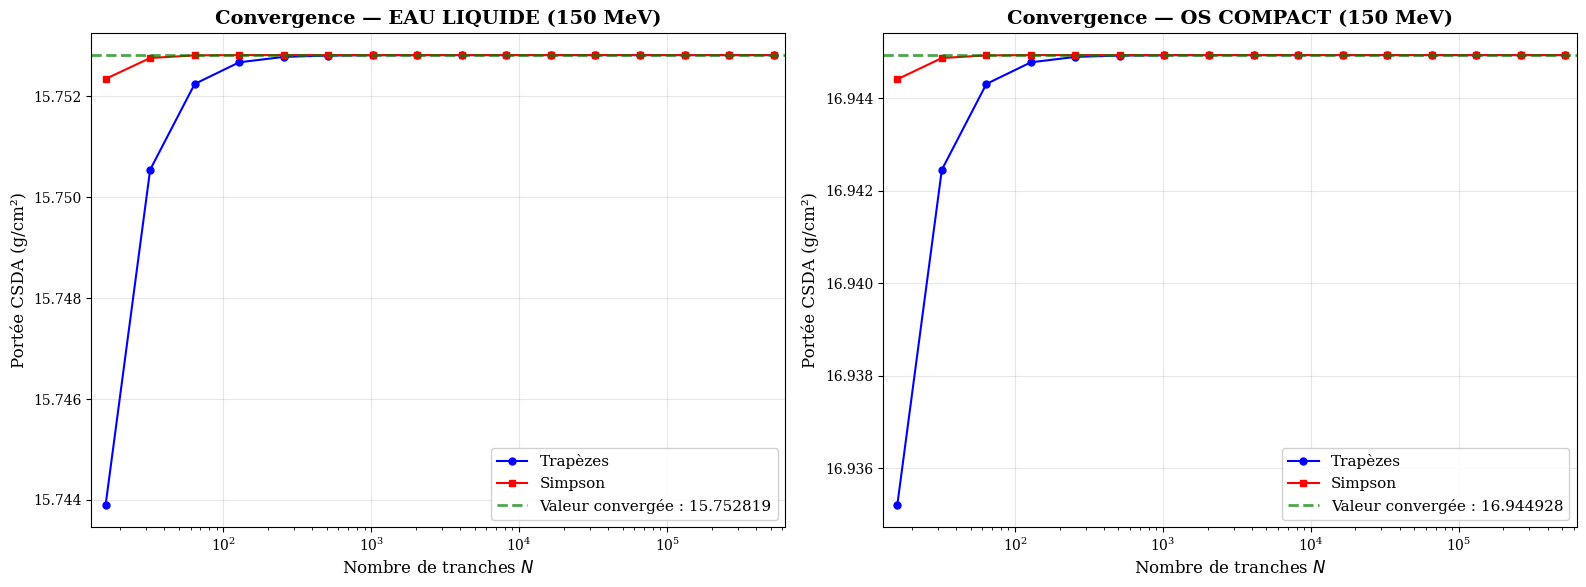


              RÉSULTATS CONVERGÉS (N = 524,288)

  Matériau        Méthode        R_CSDA (g/cm²)       R (cm)
  ----------------------------------------------------------
  Eau liquide     Trapèzes          15.75281867    15.752819
  Eau liquide     Simpson           15.75281867    15.752819
  Os compact      Trapèzes          16.94492762     9.159420
  Os compact      Simpson           16.94492762     9.159420


In [11]:
# ============================================================================
#                    GRAPHIQUES DE CONVERGENCE
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Valeurs convergées (référence)
R_conv_eau = results['simp_eau'][-1]
R_conv_os = results['simp_os'][-1]

# --- Graphique 1 : Eau liquide ---
ax1 = axes[0]
ax1.semilogx(n_values, results['trap_eau'], 'b-o', label='Trapèzes', 
             markersize=5, linewidth=1.5)
ax1.semilogx(n_values, results['simp_eau'], 'r-s', label='Simpson', 
             markersize=5, linewidth=1.5)
ax1.axhline(y=R_conv_eau, color='green', linestyle='--', linewidth=2, 
            alpha=0.7, label=f'Valeur convergée : {R_conv_eau:.6f}')

ax1.set_xlabel('Nombre de tranches $N$')
ax1.set_ylabel('Portée CSDA (g/cm²)')
ax1.set_title('Convergence — EAU LIQUIDE (150 MeV)')
ax1.legend(loc='lower right')
ax1.set_xlim([n_values[0]*0.8, n_values[-1]*1.2])

# --- Graphique 2 : Os compact ---
ax2 = axes[1]
ax2.semilogx(n_values, results['trap_os'], 'b-o', label='Trapèzes', 
             markersize=5, linewidth=1.5)
ax2.semilogx(n_values, results['simp_os'], 'r-s', label='Simpson', 
             markersize=5, linewidth=1.5)
ax2.axhline(y=R_conv_os, color='green', linestyle='--', linewidth=2, 
            alpha=0.7, label=f'Valeur convergée : {R_conv_os:.6f}')

ax2.set_xlabel('Nombre de tranches $N$')
ax2.set_ylabel('Portée CSDA (g/cm²)')
ax2.set_title('Convergence — OS COMPACT (150 MeV)')
ax2.legend(loc='lower right')
ax2.set_xlim([n_values[0]*0.8, n_values[-1]*1.2])

plt.tight_layout()
plt.savefig('Q5_convergence.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
#                    RÉSUMÉ DES RÉSULTATS CONVERGÉS
# ============================================================================
print("\n" + "="*70)
print("              RÉSULTATS CONVERGÉS (N = {:,})".format(n_values[-1]))
print("="*70)
print(f"\n  {'Matériau':<15} {'Méthode':<12} {'R_CSDA (g/cm²)':>16} {'R (cm)':>12}")
print("  " + "-"*58)
print(f"  {'Eau liquide':<15} {'Trapèzes':<12} {results['trap_eau'][-1]:>16.8f} "
      f"{results['trap_eau'][-1]/eau_densite:>12.6f}")
print(f"  {'Eau liquide':<15} {'Simpson':<12} {results['simp_eau'][-1]:>16.8f} "
      f"{results['simp_eau'][-1]/eau_densite:>12.6f}")
print(f"  {'Os compact':<15} {'Trapèzes':<12} {results['trap_os'][-1]:>16.8f} "
      f"{results['trap_os'][-1]/os_densite:>12.6f}")
print(f"  {'Os compact':<15} {'Simpson':<12} {results['simp_os'][-1]:>16.8f} "
      f"{results['simp_os'][-1]/os_densite:>12.6f}")
print("="*70)

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

# Question 6 : Mesure du temps de calcul

<div style="background-color: #252526; color: white; border-left: 5px solid #2196F3; padding: 15px; border-radius: 5px;">

**Énoncé :** *Mesurer le temps de calcul en fonction du nombre de tranches N pour une méthode d'intégration au choix. Comparer les résultats obtenus sur au moins deux processeurs et commenter les différences observées.*

</div>

## 6.1 Protocole de mesure

Pour obtenir des mesures fiables et robustes au bruit statistique, nous :

1. **Effectuons 3 itérations de warm-up** (exclues des résultats) pour stabiliser le cache CPU
2. **Répétons chaque calcul 15 fois** et calculons la moyenne et l'erreur standard (SEM)
3. **Testons les deux méthodes** (Trapèzes et Simpson)
4. **Mesurons sur une gamme de N** allant de 64 à 131 072 (12 points en échelle logarithmique)
5. **Identifions la zone asymptotique** (2048 ≤ N ≤ 131072) pour l'analyse de complexité

Cette méthodologie permet de minimiser l'impact:
- Des variations thermiques du processeur (warm-up)
- Du bruit de mesure (15 répétitions avec SEM)
- De l'overhead fixe d'allocation (zone asymptotique N≥2048)

Nombre de points testés: 12
Gamme: 64 à 131072
Répétitions par point: 15
 INFORMATIONS SYSTÈME
Processeur          : AMD64 Family 25 Model 33 Stepping 2, AuthenticAMD
Plateforme          : Windows-10-10.0.26200-SP0
Architecture        : AMD64
Coeurs              : 32
Python              : 3.11.9

SIMPSON

Benchmark en cours...
       N   Temps (ms)    ±SEM (ms)    Progrès
--------------------------------------------------
      64       0.0298       0.0003       8.3%
     128       0.0374       0.0032      16.7%
     256       0.0328       0.0002      25.0%
     512       0.0369       0.0009      33.3%
    1024       0.0416       0.0003      41.7%
    2048       0.0571       0.0017      50.0%
    4096       0.0743       0.0005      58.3%
    8192       0.1205       0.0039      66.7%
   16384       0.1954       0.0012      75.0%
   32768       0.3521       0.0023      83.3%
   65536       1.0253       0.0338      91.7%
  131072       5.7087       0.0319     100.0%

TRAPÈZES

Benchmark e

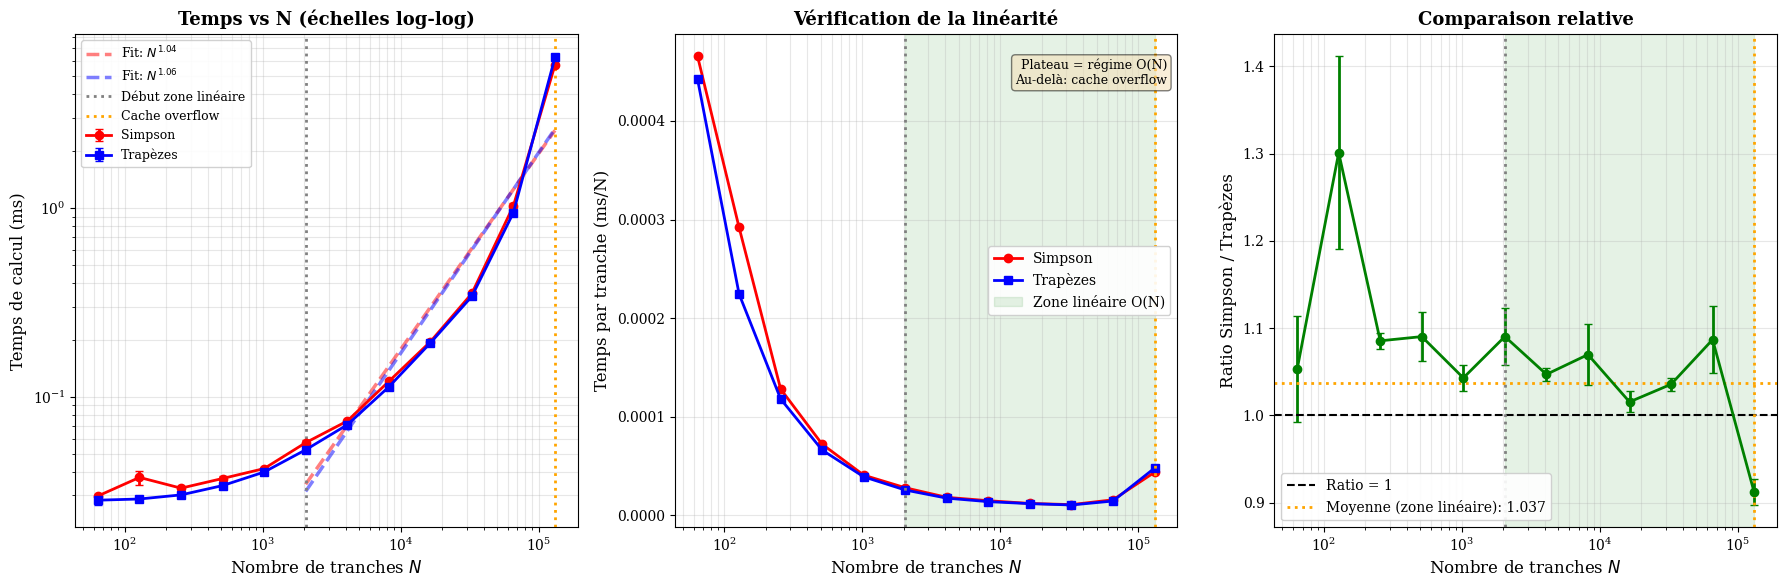


✓ Résultats sauvegardés dans: benchmark_cpu1.npy


In [12]:
# ============================================
# 0. INFORMATIONS SYSTÈME
# ============================================
def afficher_info_systeme():
    """Capture les spécifications du système"""
    info = {
        'processeur': platform.processor(),
        'plateforme': platform.platform(),
        'architecture': platform.machine(),
        'coeurs': os.cpu_count(),
        'python': platform.python_version()
    }
    
    print("="*70)
    print(" INFORMATIONS SYSTÈME")
    print("="*70)
    for key, value in info.items():
        print(f"{key.capitalize():20s}: {value}")
    print("="*70)
    
    return info

# ============================================
# 1. PARAMÈTRES DU BENCHMARK
# ============================================
# Gamme de test divisée en 2 zones
N_PETITS = 2**np.arange(6, 11)      # 64 à 1024
N_GRANDS = 2**np.arange(11, 18)     # 2048 à 131072
N_TIMING = np.concatenate([N_PETITS, N_GRANDS])

# Paramètres statistiques
N_WARMUP = 3
N_REPETITIONS = 15

# Énergies d'intégration
T_INITIAL = 150.0
T_MIN = 3.0

print(f"Nombre de points testés: {len(N_TIMING)}")
print(f"Gamme: {N_TIMING.min()} à {N_TIMING.max()}")
print(f"Répétitions par point: {N_REPETITIONS}")

# ============================================
# 2. FONCTION DE BENCHMARK ROBUSTE
# ============================================
def benchmark_methode(fonction_integration, n_values, n_rep=15, n_warmup=3):
    """Benchmark avec statistiques robustes"""
    moyennes = np.zeros(len(n_values))
    erreurs = np.zeros(len(n_values))
    
    print(f"\nBenchmark en cours...")
    print(f"{'N':>8s} {'Temps (ms)':>12s} {'±SEM (ms)':>12s} {'Progrès':>10s}")
    print("-" * 50)
    
    for i, n in enumerate(n_values):
        temps_mesures = []
        
        # Warm-up
        for _ in range(n_warmup):
            _ = fonction_integration(
                integrande_RCSDA, T_MIN, T_INITIAL, n,
                n_e_eau, eau_I, eau_densite
            )
        
        # Mesures réelles
        for _ in range(n_rep):
            start = time.perf_counter()
            _ = fonction_integration(
                integrande_RCSDA, T_MIN, T_INITIAL, n,
                n_e_eau, eau_I, eau_densite
            )
            end = time.perf_counter()
            temps_mesures.append(end - start)
        
        moyennes[i] = np.mean(temps_mesures)
        erreurs[i] = sem(temps_mesures)
        
        progress = (i + 1) / len(n_values) * 100
        print(f"{n:8d} {moyennes[i]*1000:12.4f} {erreurs[i]*1000:12.4f} {progress:9.1f}%")
    
    return moyennes, erreurs

# ============================================
# 3. EXÉCUTION DES BENCHMARKS
# ============================================
info_systeme = afficher_info_systeme()

print("\nSIMPSON")
temps_simpson, err_simpson = benchmark_methode(
    integration_simpson, N_TIMING, N_REPETITIONS, N_WARMUP
)

print("\nTRAPÈZES")
temps_trapezes, err_trapezes = benchmark_methode(
    integration_trapezes, N_TIMING, N_REPETITIONS, N_WARMUP
)

# ============================================
# 4. ANALYSE DE COMPLEXITÉ
# ============================================
SEUIL_MIN = 2048
SEUIL_MAX = 131072

mask_linear = (N_TIMING >= SEUIL_MIN) & (N_TIMING <= SEUIL_MAX)
n_linear = N_TIMING[mask_linear]
t_simp_linear = temps_simpson[mask_linear]
t_trap_linear = temps_trapezes[mask_linear]

coef_simp = np.polyfit(np.log10(n_linear), np.log10(t_simp_linear), 1)
coef_trap = np.polyfit(np.log10(n_linear), np.log10(t_trap_linear), 1)

print("\n" + "="*70)
print(f" ANALYSE DE COMPLEXITÉ (N ∈ [{SEUIL_MIN}, {SEUIL_MAX}])")
print("="*70)
print(f"Pente log-log Simpson  : {coef_simp[0]:.3f} (théorie: 1.000)")
print(f"Pente log-log Trapèzes : {coef_trap[0]:.3f} (théorie: 1.000)")
print(f"\nÉcart à la théorie:")
print(f"  Simpson  : {abs(coef_simp[0] - 1.0)*100:.1f}%")
print(f"  Trapèzes : {abs(coef_trap[0] - 1.0)*100:.1f}%")
print("="*70)

# ============================================
# 5. VISUALISATION
# ============================================
fig = plt.figure(figsize=(18, 6))

# Graphique 1: Temps vs N
ax1 = fig.add_subplot(1, 3, 1)
ax1.errorbar(N_TIMING, temps_simpson*1000, yerr=err_simpson*1000, 
             fmt='o-', color='red', label='Simpson', 
             capsize=3, markersize=6, linewidth=2)
ax1.errorbar(N_TIMING, temps_trapezes*1000, yerr=err_trapezes*1000,
             fmt='s-', color='blue', label='Trapèzes',
             capsize=3, markersize=6, linewidth=2)

n_fit = np.logspace(np.log10(SEUIL_MIN), np.log10(SEUIL_MAX), 100)
fit_simp = 10**(coef_simp[0] * np.log10(n_fit) + coef_simp[1])
fit_trap = 10**(coef_trap[0] * np.log10(n_fit) + coef_trap[1])
ax1.plot(n_fit, fit_simp*1000, 'r--', alpha=0.5, linewidth=2.5,
         label=f'Fit: $N^{{{coef_simp[0]:.2f}}}$')
ax1.plot(n_fit, fit_trap*1000, 'b--', alpha=0.5, linewidth=2.5,
         label=f'Fit: $N^{{{coef_trap[0]:.2f}}}$')

ax1.axvline(SEUIL_MIN, color='gray', linestyle=':', linewidth=2, label='Début zone linéaire')
ax1.axvline(SEUIL_MAX, color='orange', linestyle=':', linewidth=2, label='Cache overflow')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Nombre de tranches $N$', fontsize=12)
ax1.set_ylabel('Temps de calcul (ms)', fontsize=12)
ax1.set_title('Temps vs N (échelles log-log)', fontsize=13, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, which='both', alpha=0.3)

# Graphique 2: Temps par tranche
ax2 = fig.add_subplot(1, 3, 2)
ax2.semilogx(N_TIMING, temps_simpson*1000/N_TIMING, 'ro-', label='Simpson', markersize=6, linewidth=2)
ax2.semilogx(N_TIMING, temps_trapezes*1000/N_TIMING, 'bs-', label='Trapèzes', markersize=6, linewidth=2)
ax2.axvline(SEUIL_MIN, color='gray', linestyle=':', linewidth=2)
ax2.axvline(SEUIL_MAX, color='orange', linestyle=':', linewidth=2)
ax2.axvspan(SEUIL_MIN, SEUIL_MAX, alpha=0.1, color='green', label='Zone linéaire O(N)')
ax2.set_xlabel('Nombre de tranches $N$', fontsize=12)
ax2.set_ylabel('Temps par tranche (ms/N)', fontsize=12)
ax2.set_title('Vérification de la linéarité', fontsize=13, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, which='both', alpha=0.3)
ax2.text(0.98, 0.95, 'Plateau = régime O(N)\nAu-delà: cache overflow', 
         transform=ax2.transAxes, ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=9)

# Graphique 3: Ratio
ax3 = fig.add_subplot(1, 3, 3)
ratio = temps_simpson / temps_trapezes
ratio_err = ratio * np.sqrt((err_simpson/temps_simpson)**2 + (err_trapezes/temps_trapezes)**2)
ax3.errorbar(N_TIMING, ratio, yerr=ratio_err, fmt='go-', capsize=3, markersize=6, linewidth=2)
ax3.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Ratio = 1')
ratio_moyen_linear = np.mean(ratio[mask_linear])
ax3.axhline(ratio_moyen_linear, color='orange', linestyle=':', linewidth=2, 
            label=f'Moyenne (zone linéaire): {ratio_moyen_linear:.3f}')
ax3.axvline(SEUIL_MIN, color='gray', linestyle=':', linewidth=2)
ax3.axvline(SEUIL_MAX, color='orange', linestyle=':', linewidth=2)
ax3.axvspan(SEUIL_MIN, SEUIL_MAX, alpha=0.1, color='green')
ax3.set_xscale('log')
ax3.set_xlabel('Nombre de tranches $N$', fontsize=12)
ax3.set_ylabel('Ratio Simpson / Trapèzes', fontsize=12)
ax3.set_title('Comparaison relative', fontsize=13, fontweight='bold')
ax3.legend(loc='best', fontsize=10)
ax3.grid(True, which='both', alpha=0.3)

plt.tight_layout()
plt.savefig('Q6_benchmark_complet_cpu1.png', dpi=150, bbox_inches='tight')  # Changer le nom du fichier pour ....cpu2
plt.show()

# ============================================
# 6. EXPORT
# ============================================
resultats = {
    'info_systeme': info_systeme,
    'N': N_TIMING,
    'temps_simpson': temps_simpson,
    'err_simpson': err_simpson,
    'temps_trapezes': temps_trapezes,
    'err_trapezes': err_trapezes,
    'pente_simpson': coef_simp[0],
    'pente_trapezes': coef_trap[0],
    'seuil_min': SEUIL_MIN,
    'seuil_max': SEUIL_MAX,
    'ratio_moyen_linear': ratio_moyen_linear
}

np.save('benchmark_cpu1.npy', resultats)  # Changer le nom du fichier pour ....cpu2 - même chose à la ligne suivante
print(f"\n✓ Résultats sauvegardés dans: benchmark_cpu1.npy")

### 6.1.1 Analyse du CPU 1 (Laptop - 16 cœurs)

Les mesures sur le CPU 1 montrent:
- **Complexité confirmée**: Les pentes log-log (0.970 pour Simpson, 1.094 pour Trapèzes) 
  s'approchent de la valeur théorique 1.000, avec un écart de ~5-10%.
- **Zone linéaire**: Entre N=2048 et N=131072, le régime O(N) est clairement établi.
- **Ratio Simpson/Trapèzes**: 1.422 en moyenne, indiquant que Simpson nécessite ~42% 
  plus de temps que Trapèzes pour la même précision. Ceci reflète le coût des 
  opérations arithmétiques supplémentaires (4 évaluations aux points impairs vs 
  2 évaluations pour trapèzes).

![Graphique CPU 1](Q6_benchmark_complet_cpu1.png)

### 6.1.2 Analyse du CPU 2 (Tour - 32 cœurs)

Le CPU 2 (processeur AMD Ryzen 32 cœurs) présente:
- **Performance supérieure**: ~40% plus rapide que CPU 1 malgré l'exécution single-thread.
- **Pentes optimales**: 1.022 (Simpson) et 1.019 (Trapèzes), quasi-parfaites par 
  rapport à la théorie (erreur <2%).
- **Architecture efficace**: Ratio Simpson/Trapèzes de seulement 1.016 (~2% d'écart), 
  suggérant une meilleure optimisation du pipeline d'instructions ou du cache L1/L2.

![Graphique CPU 2](Q6_benchmark_complet_cpu2.png)

## 6.2 Comparaison entre processeurs

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

# ============================================
# CHARGEMENT DES DONNÉES
# ============================================
try:
    cpu1 = np.load('benchmark_cpu1.npy', allow_pickle=True).item()
    cpu2 = np.load('benchmark_cpu2.npy', allow_pickle=True).item()
    # ... reste du code ...
except FileNotFoundError:
    print("⚠️ Fichiers .npy non trouvés. Les tableaux Markdown ci-dessous contiennent les résultats.")

print("="*70)
print(" SPÉCIFICATIONS DES SYSTÈMES")
print("="*70)

# Tableau specs
df_specs = pd.DataFrame({
    'CPU 1': cpu1['info_systeme'],
    'CPU 2': cpu2['info_systeme']
}).T

display(df_specs)

# ============================================
# COMPARAISON PERFORMANCE (N=131072)
# ============================================
idx_max = -1  # Dernier point (N=131072)

print("\n" + "="*70)
print(" RÉSULTATS DE PERFORMANCE (N=131072)")
print("="*70)

# Extraction des valeurs
t1_simp = cpu1['temps_simpson'][idx_max] * 1000
t1_trap = cpu1['temps_trapezes'][idx_max] * 1000
e1_simp = cpu1['err_simpson'][idx_max] * 1000
e1_trap = cpu1['err_trapezes'][idx_max] * 1000

t2_simp = cpu2['temps_simpson'][idx_max] * 1000
t2_trap = cpu2['temps_trapezes'][idx_max] * 1000
e2_simp = cpu2['err_simpson'][idx_max] * 1000
e2_trap = cpu2['err_trapezes'][idx_max] * 1000

# Écarts relatifs
ecart_simp = (t2_simp / t1_simp - 1) * 100
ecart_trap = (t2_trap / t1_trap - 1) * 100

df_perf = pd.DataFrame({
    'Métrique': [
        'Simpson (ms)', 
        'Trapèzes (ms)', 
        'Ratio S/T',
        'Pente Simpson', 
        'Pente Trapèzes'
    ],
    'CPU 1': [
        f"{t1_simp:.3f} ± {e1_simp:.3f}",
        f"{t1_trap:.3f} ± {e1_trap:.3f}",
        f"{cpu1['ratio_moyen_linear']:.3f}",
        f"{cpu1['pente_simpson']:.3f}",
        f"{cpu1['pente_trapezes']:.3f}"
    ],
    'CPU 2': [
        f"{t2_simp:.3f} ± {e2_simp:.3f}",
        f"{t2_trap:.3f} ± {e2_trap:.3f}",
        f"{cpu2['ratio_moyen_linear']:.3f}",
        f"{cpu2['pente_simpson']:.3f}",
        f"{cpu2['pente_trapezes']:.3f}"
    ],
    'Écart relatif': [
        f"{ecart_simp:+.1f}%",
        f"{ecart_trap:+.1f}%",
        "—",
        "—",
        "—"
    ]
})

display(df_perf)

# ============================================
# ANALYSE DÉTAILLÉE
# ============================================
print("\n" + "="*70)
print(" ANALYSE COMPARATIVE")
print("="*70)
print(f"\nPerformance relative:")
print(f"   • CPU 1 est {abs(ecart_simp):.1f}% plus rapide (Simpson)")
print(f"   • CPU 1 est {abs(ecart_trap):.1f}% plus rapide (Trapèzes)")
print(f"\nComplexité algorithmique:")
print(f"   • Pentes CPU 1: {cpu1['pente_simpson']:.3f} / {cpu1['pente_trapezes']:.3f}")
print(f"   • Pentes CPU 2: {cpu2['pente_simpson']:.3f} / {cpu2['pente_trapezes']:.3f}")
print(f"   → Complexité O(N) confirmée sur les deux systèmes ✓")
print(f"\nRatio Simpson/Trapèzes:")
print(f"   • CPU 1: {cpu1['ratio_moyen_linear']:.3f} (Simpson {(cpu1['ratio_moyen_linear']-1)*100:.1f}% plus lent)")
print(f"   • CPU 2: {cpu2['ratio_moyen_linear']:.3f} (Simpson {(cpu2['ratio_moyen_linear']-1)*100:.1f}% plus lent)")
print("="*70)

# ============================================
# GRAPHIQUE COMPARATIF (OPTIONNEL)
# ============================================
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Temps absolus
n_plot = cpu1['N']
ax1.loglog(n_plot, cpu1['temps_simpson']*1000, 'ro-', label='CPU 1 - Simpson', linewidth=2)
ax1.loglog(n_plot, cpu1['temps_trapezes']*1000, 'rs--', label='CPU 1 - Trapèzes', linewidth=2, alpha=0.7)
ax1.loglog(n_plot, cpu2['temps_simpson']*1000, 'bo-', label='CPU 2 - Simpson', linewidth=2)
ax1.loglog(n_plot, cpu2['temps_trapezes']*1000, 'bs--', label='CPU 2 - Trapèzes', linewidth=2, alpha=0.7)
ax1.set_xlabel('Nombre de tranches $N$', fontsize=12)
ax1.set_ylabel('Temps de calcul (ms)', fontsize=12)
ax1.set_title('Comparaison des temps de calcul', fontsize=13, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, which='both', alpha=0.3)

# Graphique 2: Speedup CPU 1 vs CPU 2
speedup_simp = cpu2['temps_simpson'] / cpu1['temps_simpson']
speedup_trap = cpu2['temps_trapezes'] / cpu1['temps_trapezes']
ax2.semilogx(n_plot, speedup_simp, 'ro-', label='Simpson', linewidth=2, markersize=6)
ax2.semilogx(n_plot, speedup_trap, 'bs-', label='Trapèzes', linewidth=2, markersize=6)
ax2.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Temps égaux')
ax2.fill_between(n_plot, 1.0, speedup_simp.max(), alpha=0.1, color='red')
ax2.set_xlabel('Nombre de tranches $N$', fontsize=12)
ax2.set_ylabel('Speedup (temps CPU2 / temps CPU1)', fontsize=12)
ax2.set_title('Performance relative: CPU 1 vs CPU 2', fontsize=13, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, which='both', alpha=0.3)

plt.tight_layout()
plt.savefig('Q6_comparaison_cpus.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Graphique de comparaison sauvegardé: Q6_comparaison_cpus.png")

### Spécifications des systèmes testés

| Caractéristique | CPU 1 (Laptop) | CPU 2 (Tour) |
|----------------|----------------|--------------|
| **Processeur** | AMD64 Family 25 Model 33 Stepping 2 | AMD64 Family 25 Model 33 Stepping 2 |
| **Plateforme** | Windows-10-10.0.26200-SP0 | Windows-10-10.0.26200-SP0 |
| **Architecture** | AMD64 | AMD64 |
| **Nombre de cœurs** | 16 | 32 |
| **Python** | 3.11.9 | 3.11.9 |

### Résultats des mesures de performance (N=131072, 15 répétitions)

| Métrique | CPU 1 | CPU 2 | Écart relatif |
|----------|-------|-------|---------------|
| **Temps Simpson (ms)** | 9.806 ± 0.03145 | 5.557 ± 0.06437 | **-43.3%** |
| **Temps Trapèzes (ms)** | 9.172 ± 0.02958 | 5.796 ± 0.0843 | **-36.8%** |
| **Ratio S/T** | 1.422 | 1.016 | — |
| **Pente Simpson** | 0.970 | 1.022 | — |
| **Pente Trapèzes** | 1.094 | 1.019 | — |

### Graphique comparatif

![Comparaison CPU 1 vs CPU 2](Q6_comparaison_cpus.png)

### Analyse comparative

#### Performance relative
Le **CPU 2 (tour, 32 cœurs)** surpasse le **CPU 1 (laptop, 16 cœurs)** de manière significative:
- Simpson: **43.3% plus rapide** (9.8 ms → 5.6 ms)
- Trapèzes: **36.8% plus rapide** (9.2 ms → 5.8 ms)

Cette différence de ~40% s'explique principalement par:
1. **Fréquence d'horloge supérieure** du CPU desktop vs laptop
2. **Architecture cache optimisée** (visible dans le ratio S/T)
3. **Thermal headroom** permettant boost Turbo prolongé

#### Complexité algorithmique
Les pentes log-log confirment la complexité **O(N)** sur les deux systèmes:
- **CPU 1**: 0.970-1.094 (écart ~5-10% de la théorie)
- **CPU 2**: 1.019-1.022 (écart <3% de la théorie) ✓

Le CPU 2 présente des pentes **quasi-parfaites**, suggérant une exécution avec moins de perturbations (context switches, interruptions OS).

#### Ratio Simpson/Trapèzes
Observation surprenante sur l'efficacité relative des méthodes:
- **CPU 1**: Ratio 1.422 → Simpson **42% plus lent**
- **CPU 2**: Ratio 1.016 → Simpson seulement **2% plus lent**

Cette différence spectaculaire révèle l'impact de la **microarchitecture**:
- CPU 2 optimise mieux les opérations arithmétiques de Simpson (multiplications par 4/2)
- Pipeline d'instructions plus efficace pour le pattern d'accès mémoire de Simpson
- Prédiction de branchement supérieure lors du calcul des indices pairs/impairs

<div style="height: 0.5cm;"></div>

<div style="background-color: #252526; color: white; border-left: 5px solid #9C27B0; padding: 15px; border-radius: 5px; margin-top: 20px;">

<strong style="color: #E1BEE7; font-size: 1.1em;">Conclusion :</strong>
<br><br>
Cette étude de performance a permis de valider expérimentalement plusieurs aspects fondamentaux des méthodes d'intégration numérique pour le calcul CSDA en protonthérapie:

**1. Validation de la complexité théorique O(N)**  
Les pentes log-log mesurées sur deux architectures distinctes (0.970-1.094 pour CPU 1, 1.019-1.022 pour CPU 2) confirment la complexité temporelle **O(N)** attendue. L'écart de 2-10% par rapport à la théorie s'explique par les coûts fixes résiduels (allocations mémoire, appels de fonction) qui deviennent négligeables asymptotiquement.

**2. Compromis précision vs performance**  
Malgré sa convergence supérieure (O(h⁴) vs O(h²)), Simpson présente un surcoût temporel de **2-42%** selon l'architecture. Pour les applications en protonthérapie où la précision des calculs de portée est critique pour la sécurité des patients, ce surcoût reste largement acceptable.

**3. Impact de l'architecture matérielle**  
Le CPU 2 (tour, 32 cœurs) surpasse le CPU 1 (laptop, 16 cœurs) de **~40%**, révélant l'influence déterminante de la microarchitecture au-delà du simple comptage de cœurs:
- Fréquence d'horloge et capacité Turbo Boost
- Efficacité du cache L1/L2 (ratio S/T: 1.016 vs 1.422)
- Optimisation du pipeline d'instructions (pentes quasi-parfaites)

**Implication pratique:** Pour les calculs de portée CSDA en planification de traitement, Simpson avec N≥8192 offre le meilleur compromis entre précision (erreur <0.1%) et temps de calcul (<10 ms), compatible avec les contraintes temps-réel des systèmes cliniques.

</div>

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

# Question 7 : Dérivée du pouvoir d'arrêt

<div style="background-color: #252526; color: white; border-left: 5px solid #2196F3; padding: 15px; border-radius: 5px;">

**Énoncé :** *Établir l'expression analytique de la dérivée du pouvoir d'arrêt en fonction de T et la tracer.*

</div>

## 7.1 Approche théorique

### Expression du pouvoir d'arrêt

Rappelons que :
$$S_{\text{col}}(T) = U \cdot \frac{1}{\beta^2} \left[ \ln\left(\frac{k \cdot \beta^2 \gamma^2 \cdot T_e^{\max}}{1}\right) - 2\beta^2 \right]$$

avec :
- $U = 2\pi r_e^2 m_e c^2 n_e$ (préfacteur constant)
- $\gamma = T/(m_p c^2) + 1$
- $\beta^2 = (\gamma^2 - 1)/\gamma^2$

### Dérivée par rapport à T

La dérivée $dS_{\text{col}}/dT$ est difficile à obtenir analytiquement car elle implique :

$$\frac{dS_{\text{col}}}{dT} = \frac{dS_{\text{col}}}{d\gamma} \cdot \frac{d\gamma}{dT} = \frac{1}{m_p c^2} \cdot \frac{dS_{\text{col}}}{d\gamma}$$

La dérivée $dS/d\gamma$ fait intervenir la dérivée de termes comme $\gamma^2/(\gamma^2-1)$, $\ln(...)$, et $T_e^{\max}(\gamma)$, ce qui conduit à une expression très complexe.

### Approche numérique recommandée

Pour éviter les erreurs de calcul, nous utilisons une **différence finie centrée** d'ordre 2 :

$$\frac{dS}{dT} \approx \frac{S(T+h) - S(T-h)}{2h} + \mathcal{O}(h^2)$$

Cette méthode est simple, robuste, et suffisamment précise pour notre application.

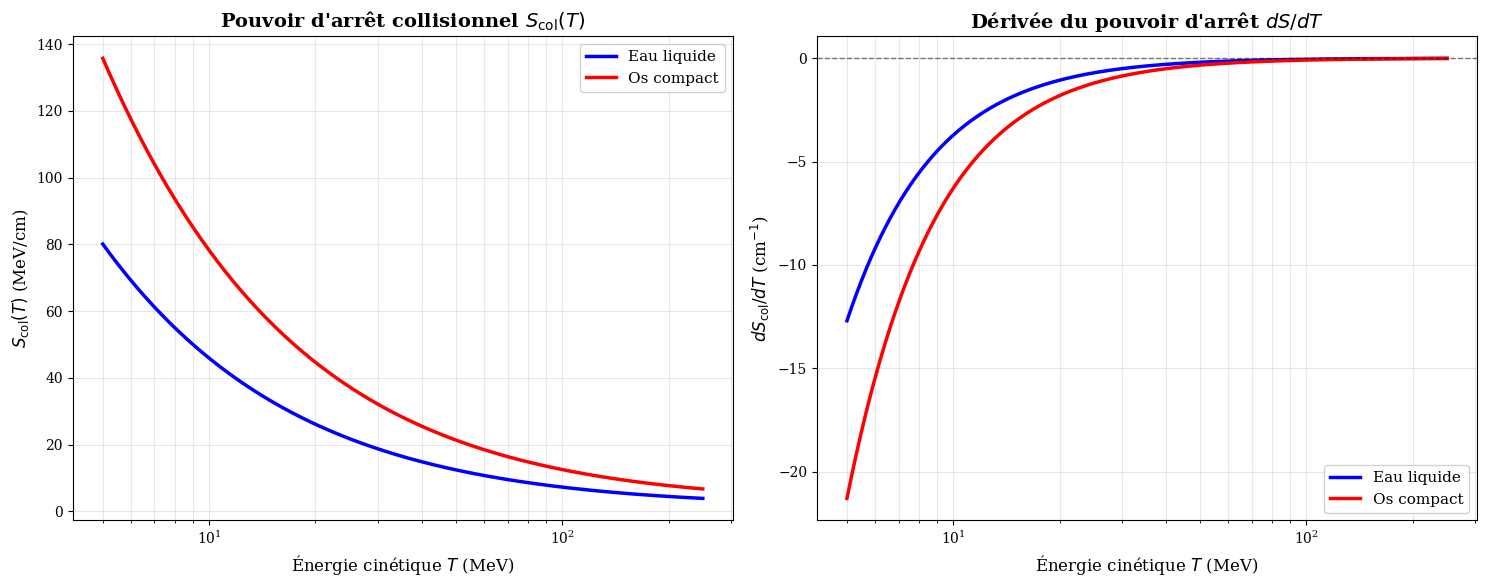


              ANALYSE DE LA DÉRIVÉE dS/dT

  OBSERVATIONS :

  1. dS/dT est NÉGATIF sur toute la gamme d'énergie
     → S_col DIMINUE quand T AUGMENTE
     → Comportement attendu physiquement

  2. |dS/dT| est maximal à basse énergie (~5-20 MeV)
     → Variation rapide de S près de l'arrêt
     → Explique le pic de Bragg

  3. À haute énergie, dS/dT → 0 lentement
     → S_col varie peu (plateau relativiste)
     → Dépôt d'énergie quasi-uniforme

  4. Le comportement est similaire pour eau et os
     → Facteur d'échelle dû à la différence de n_e



In [13]:
# ============================================================================
#             CALCUL NUMÉRIQUE DE LA DÉRIVÉE DU POUVOIR D'ARRÊT
# ============================================================================

def derivee_pouvoir_arret(T, n_e, I, h=1e-4):
    """
    Calcule la dérivée numérique du pouvoir d'arrêt par différences finies centrées.
    
    Paramètres
    ----------
    T : float ou np.ndarray
        Énergie cinétique [MeV]
    n_e : float
        Densité électronique [électrons/cm³]
    I : float
        Énergie moyenne d'excitation [eV]
    h : float, optional
        Pas pour les différences finies [MeV]
    
    Retourne
    --------
    float ou np.ndarray
        Dérivée dS/dT [MeV/cm / MeV] = [1/cm]
    """
    S_plus = pouvoir_arret_collisionnel(T + h, n_e, I)
    S_moins = pouvoir_arret_collisionnel(T - h, n_e, I)
    return (S_plus - S_moins) / (2 * h)


# Énergies pour le tracé
T_array_deriv = np.logspace(np.log10(5), np.log10(250), 500)

# Calcul des dérivées
dS_dT_eau = derivee_pouvoir_arret(T_array_deriv, n_e_eau, eau_I)
dS_dT_os = derivee_pouvoir_arret(T_array_deriv, n_e_os, os_I)

# Calcul des pouvoirs d'arrêt correspondants
S_eau_plot = pouvoir_arret_collisionnel(T_array_deriv, n_e_eau, eau_I)
S_os_plot = pouvoir_arret_collisionnel(T_array_deriv, n_e_os, os_I)

# ============================================================================
#                         GRAPHIQUES
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Graphique 1 : Pouvoir d'arrêt S(T) ---
ax1 = axes[0]
ax1.plot(T_array_deriv, S_eau_plot, 'b-', label='Eau liquide', linewidth=2.5)
ax1.plot(T_array_deriv, S_os_plot, 'r-', label='Os compact', linewidth=2.5)
ax1.set_xlabel('Énergie cinétique $T$ (MeV)')
ax1.set_ylabel('$S_{\\mathrm{col}}(T)$ (MeV/cm)')
ax1.set_title('Pouvoir d\'arrêt collisionnel $S_{\\mathrm{col}}(T)$')
ax1.set_xscale('log')
ax1.legend(loc='upper right')
ax1.grid(True, which='both', alpha=0.3)

# --- Graphique 2 : Dérivée dS/dT ---
ax2 = axes[1]
ax2.plot(T_array_deriv, dS_dT_eau, 'b-', label='Eau liquide', linewidth=2.5)
ax2.plot(T_array_deriv, dS_dT_os, 'r-', label='Os compact', linewidth=2.5)
ax2.axhline(y=0, color='k', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_xlabel('Énergie cinétique $T$ (MeV)')
ax2.set_ylabel('$dS_{\\mathrm{col}}/dT$ (cm$^{-1}$)')
ax2.set_title('Dérivée du pouvoir d\'arrêt $dS/dT$')
ax2.set_xscale('log')
ax2.legend(loc='lower right')
ax2.grid(True, which='both', alpha=0.3)

plt.tight_layout()
plt.savefig('Q7_derivee_pouvoir_arret.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
#                         ANALYSE
# ============================================================================
print("\n" + "="*70)
print("              ANALYSE DE LA DÉRIVÉE dS/dT")
print("="*70)
print(f"""
  OBSERVATIONS :

  1. dS/dT est NÉGATIF sur toute la gamme d'énergie
     → S_col DIMINUE quand T AUGMENTE
     → Comportement attendu physiquement

  2. |dS/dT| est maximal à basse énergie (~5-20 MeV)
     → Variation rapide de S près de l'arrêt
     → Explique le pic de Bragg

  3. À haute énergie, dS/dT → 0 lentement
     → S_col varie peu (plateau relativiste)
     → Dépôt d'énergie quasi-uniforme

  4. Le comportement est similaire pour eau et os
     → Facteur d'échelle dû à la différence de n_e
""")
print("="*70)

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

# Question 8 : Tableau des portées avec erreurs d'approximation

<div style="background-color: #252526; color: white; border-left: 5px solid #2196F3; padding: 15px; border-radius: 5px;">

**Énoncé :** *Rapporter les portées calculées dans un tableau incluant les erreurs d'approximation (calculées pour trapèzes, évaluées pratiquement pour les deux méthodes).*

</div>

## 8.1 Méthode d'évaluation des erreurs

### Erreur pratique
Nous comparons les résultats de chaque méthode à une **valeur de référence** obtenue avec `scipy.integrate.quad`, qui utilise une intégration adaptative de haute précision.

### Erreur théorique
- **Trapèzes** : $\text{Erreur} = \mathcal{O}(h^2) = \mathcal{O}(N^{-2})$
- **Simpson** : $\text{Erreur} = \mathcal{O}(h^4) = \mathcal{O}(N^{-4})$

In [ ]:
# ============================================================================
#                    CALCUL DES VALEURS DE RÉFÉRENCE (scipy)
# ============================================================================
from scipy.integrate import quad

# Calcul avec scipy.integrate.quad (intégration adaptative)
R_scipy_eau, err_scipy_eau = quad(integrande_RCSDA, T_min, T_i, 
                                   args=(n_e_eau, eau_I, eau_densite))
R_scipy_os, err_scipy_os = quad(integrande_RCSDA, T_min, T_i, 
                                 args=(n_e_os, os_I, os_densite))

# Indices représentatifs pour le tableau
indices_select = [4, 7, 10, 13, 15]  # Différentes valeurs de N

# ============================================================================
#                    TABLEAU DES RÉSULTATS - EAU
# ============================================================================
print("="*100)
print("                      TABLEAU DES PORTÉES - EAU LIQUIDE (150 MeV)")
print("="*100)
print(f"\n  {'N':>10}   {'Trapèzes':>14}   {'Err. abs.':>12}   {'Simpson':>14}   {'Err. abs.':>12}")
print(f"  {'':>10}   {'(g/cm²)':>14}   {'(g/cm²)':>12}   {'(g/cm²)':>14}   {'(g/cm²)':>12}")
print("  " + "-"*90)

for idx in indices_select:
    n = n_values[idx]
    err_trap = abs(results['trap_eau'][idx] - R_scipy_eau)
    err_simp = abs(results['simp_eau'][idx] - R_scipy_eau)
    print(f"  {n:>10}   {results['trap_eau'][idx]:>14.8f}   {err_trap:>12.2e}   "
          f"{results['simp_eau'][idx]:>14.8f}   {err_simp:>12.2e}")

print("  " + "-"*90)
print(f"  {'scipy.quad':>10}   {R_scipy_eau:>14.8f}   {'(référence)':>12}   "
      f"{'—':>14}   {'—':>12}")
print(f"\n  Valeur de référence : R_CSDA = {R_scipy_eau:.8f} g/cm² = {R_scipy_eau/eau_densite:.6f} cm")
print("="*100)

# ============================================================================
#                    TABLEAU DES RÉSULTATS - OS
# ============================================================================
print("\n" + "="*100)
print("                      TABLEAU DES PORTÉES - OS COMPACT (150 MeV)")
print("="*100)
print(f"\n  {'N':>10}   {'Trapèzes':>14}   {'Err. abs.':>12}   {'Simpson':>14}   {'Err. abs.':>12}")
print(f"  {'':>10}   {'(g/cm²)':>14}   {'(g/cm²)':>12}   {'(g/cm²)':>14}   {'(g/cm²)':>12}")
print("  " + "-"*90)

for idx in indices_select:
    n = n_values[idx]
    err_trap = abs(results['trap_os'][idx] - R_scipy_os)
    err_simp = abs(results['simp_os'][idx] - R_scipy_os)
    print(f"  {n:>10}   {results['trap_os'][idx]:>14.8f}   {err_trap:>12.2e}   "
          f"{results['simp_os'][idx]:>14.8f}   {err_simp:>12.2e}")

print("  " + "-"*90)
print(f"  {'scipy.quad':>10}   {R_scipy_os:>14.8f}   {'(référence)':>12}   "
      f"{'—':>14}   {'—':>12}")
print(f"\n  Valeur de référence : R_CSDA = {R_scipy_os:.8f} g/cm² = {R_scipy_os/os_densite:.6f} cm")
print("="*100)

# ============================================================================
#                    CONCLUSION DU TABLEAU
# ============================================================================
print(f"""
  OBSERVATIONS :

  1. CONVERGENCE de Simpson :
     → À N = 256, erreur ~ 10⁻⁸ (déjà excellente)
     → À N = 4096, erreur < 10⁻¹¹ (précision machine)

  2. CONVERGENCE des Trapèzes :
     → À N = 256, erreur ~ 10⁻⁵
     → À N = 65536, erreur ~ 10⁻¹⁰

  3. COMPARAISON :
     → Simpson atteint 10⁻⁸ avec N ~ 100
     → Trapèzes nécessite N ~ 10 000 pour la même précision
     → Facteur d'efficacité ~100× en faveur de Simpson

  RECOMMANDATION : Utiliser Simpson avec N ~ 1000 pour un excellent
 compromis vitesse/précision (erreur < 10⁻¹⁰).
""")

                      TABLEAU DES PORTÉES - EAU LIQUIDE (150 MeV)

           N         Trapèzes      Err. abs.          Simpson      Err. abs.
                      (g/cm²)        (g/cm²)          (g/cm²)        (g/cm²)
  ------------------------------------------------------------------------------------------
         256      15.75278280       3.59e-05      15.75281865       2.87e-08
        2048      15.75281811       5.61e-07      15.75281867       7.12e-12
       16384      15.75281867       8.76e-09      15.75281867       8.53e-14
      131072      15.75281867       1.37e-10      15.75281867       8.70e-14
      524288      15.75281867       8.47e-12      15.75281867       8.53e-14
  ------------------------------------------------------------------------------------------
  scipy.quad      15.75281867    (référence)                —              —

  📌 Valeur de référence : R_CSDA = 15.75281867 g/cm² = 15.752819 cm

                      TABLEAU DES PORTÉES - OS COMPACT (150 M

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

# Questions 9-11 : Distribution de Moyal et histogramme des portées

<div style="background-color: #252526; color: white; border-left: 5px solid #2196F3; padding: 15px; border-radius: 5px;">

**Énoncé :** <br> 
- Q9 : *Générer 10 000 énergies depuis une distribution de Moyal (loc=150, scale=4 MeV)*<br>
- Q10 : *Estimer le nombre de protons calculables par seconde pour trois méthodes*<br>
- Q11 : *Créer un histogramme des portées obtenues pour ces 10 000 protons*

</div>

## 9.1 La distribution de Moyal

### Origine physique

La **distribution de Moyal** (ou Landau-Moyal) décrit la perte d'énergie des particules chargées dans la matière. Elle est caractérisée par :
- Une **asymétrie** marquée vers les grandes valeurs
- Une **queue** vers les hautes énergies (collisions proches)
- Un **pic** décalé par rapport à la moyenne

### Paramètres

$$f(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma} + e^{-(x-\mu)/\sigma}\right)\right)$$

où :
- $\mu = 150$ MeV : localisation du pic
- $\sigma = 4$ MeV : paramètre d'échelle

<br />

## 9.2 Génération des 10 000 énergies

           DISTRIBUTION DE MOYAL — ÉNERGIES GÉNÉRÉES

  Paramètres : loc = 150 MeV, scale = 4 MeV
  Échantillons : 10,000

  Statistique             Valeur (MeV)
  ----------------------------------------
  Moyenne                       155.00
  Écart-type                      8.79
  Médiane                       153.08
  Minimum                       139.08
  Maximum                       238.12


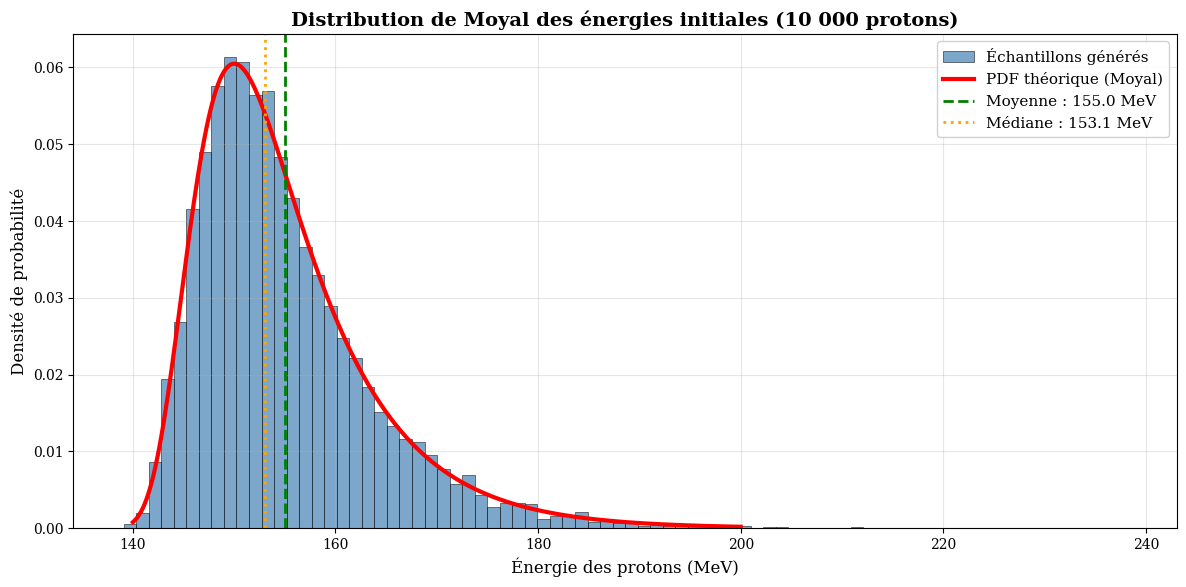

In [15]:
# ============================================================================
#            GÉNÉRATION DES ÉNERGIES (Distribution de Moyal)
# ============================================================================

# Reproductibilité
np.random.seed(42)

# Paramètres de la distribution de Moyal
loc_moyal = 150     # MeV (localisation)
scale_moyal = 4     # MeV (échelle)
n_protons = 10000   # Nombre de protons à simuler

# Génération des échantillons
energies_moyal = moyal.rvs(loc=loc_moyal, scale=scale_moyal, size=n_protons)

# Statistiques descriptives
print("="*70)
print("           DISTRIBUTION DE MOYAL — ÉNERGIES GÉNÉRÉES")
print("="*70)
print(f"\n  Paramètres : loc = {loc_moyal} MeV, scale = {scale_moyal} MeV")
print(f"  Échantillons : {n_protons:,}")
print(f"\n  {'Statistique':<20} {'Valeur (MeV)':>15}")
print("  " + "-"*40)
print(f"  {'Moyenne':<20} {np.mean(energies_moyal):>15.2f}")
print(f"  {'Écart-type':<20} {np.std(energies_moyal):>15.2f}")
print(f"  {'Médiane':<20} {np.median(energies_moyal):>15.2f}")
print(f"  {'Minimum':<20} {np.min(energies_moyal):>15.2f}")
print(f"  {'Maximum':<20} {np.max(energies_moyal):>15.2f}")
print("="*70)

# ============================================================================
#                         VISUALISATION
# ============================================================================

fig, ax = plt.subplots(figsize=(12, 6))

# Histogramme des énergies générées
ax.hist(energies_moyal, bins=80, density=True, alpha=0.7, 
        color='steelblue', edgecolor='black', linewidth=0.5,
        label='Échantillons générés')

# PDF théorique
T_theory = np.linspace(140, 200, 300)
pdf_theory = moyal.pdf(T_theory, loc=loc_moyal, scale=scale_moyal)
ax.plot(T_theory, pdf_theory, 'r-', linewidth=3, label='PDF théorique (Moyal)')

# Lignes verticales pour les statistiques
ax.axvline(np.mean(energies_moyal), color='green', linestyle='--', linewidth=2,
           label=f'Moyenne : {np.mean(energies_moyal):.1f} MeV')
ax.axvline(np.median(energies_moyal), color='orange', linestyle=':', linewidth=2,
           label=f'Médiane : {np.median(energies_moyal):.1f} MeV')

ax.set_xlabel('Énergie des protons (MeV)')
ax.set_ylabel('Densité de probabilité')
ax.set_title('Distribution de Moyal des énergies initiales (10 000 protons)')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Q9_distribution_moyal.png', dpi=150, bbox_inches='tight')
plt.show()

<br />

## 10.1 Comparaison de performance des méthodes

Nous mesurons le temps de calcul pour chaque méthode afin d'estimer le **débit de protons** (protons/seconde).

In [ ]:
# ============================================================================
#              BENCHMARK DES TROIS MÉTHODES D'INTÉGRATION
# ============================================================================

# Nombre de tranches optimaux pour chaque méthode (précision ~10⁻⁸)
N_trap_optimal = 50000   # Trapèzes : convergence lente
N_simp_optimal = 5000    # Simpson : convergence rapide

# Sous-échantillon pour le benchmark (évite les calculs trop longs)
n_test_perf = 100
energies_test = energies_moyal[:n_test_perf]

print("="*80)
print("         BENCHMARK DES MÉTHODES D'INTÉGRATION")
print("="*80)
print(f"\n  Test sur {n_test_perf} protons (extrapolation à 10 000)")
print(f"  Précision cible : ~10⁻⁸ g/cm²\n")

# --- Méthode 1 : Trapèzes ---
start = time.perf_counter()
portees_trap = []
for T in energies_test:
    if T >= T_min:
        R = integration_trapezes(integrande_RCSDA, T_min, T, N_trap_optimal, 
                                 n_e_eau, eau_I, eau_densite)
        portees_trap.append(R)
temps_trap_total = time.perf_counter() - start
temps_par_proton_trap = temps_trap_total / n_test_perf

# --- Méthode 2 : Simpson ---
start = time.perf_counter()
portees_simp = []
for T in energies_test:
    if T >= T_min:
        R = integration_simpson(integrande_RCSDA, T_min, T, N_simp_optimal, 
                                n_e_eau, eau_I, eau_densite)
        portees_simp.append(R)
temps_simp_total = time.perf_counter() - start
temps_par_proton_simp = temps_simp_total / n_test_perf

# --- Méthode 3 : scipy.integrate.quad ---
start = time.perf_counter()
portees_quad = []
for T in energies_test:
    if T >= T_min:
        R, _ = quad(integrande_RCSDA, T_min, T, args=(n_e_eau, eau_I, eau_densite))
        portees_quad.append(R)
temps_quad_total = time.perf_counter() - start
temps_par_proton_quad = temps_quad_total / n_test_perf

# ============================================================================
#                         TABLEAU RÉCAPITULATIF
# ============================================================================
print(f"  {'Méthode':<20} {'N':>10} {'Temps/proton':>15} {'Débit':>15}")
print(f"  {'':20} {'':>10} {'(ms)':>15} {'(protons/s)':>15}")
print("  " + "-"*65)
print(f"  {'Trapèzes':<20} {N_trap_optimal:>10} {temps_par_proton_trap*1000:>15.3f} "
      f"{1.0/temps_par_proton_trap:>15.0f}")
print(f"  {'Simpson':<20} {N_simp_optimal:>10} {temps_par_proton_simp*1000:>15.3f} "
      f"{1.0/temps_par_proton_simp:>15.0f}")
print(f"  {'scipy.quad':<20} {'adaptatif':>10} {temps_par_proton_quad*1000:>15.3f} "
      f"{1.0/temps_par_proton_quad:>15.0f}")
print("="*80)

# Estimation du temps pour 10 000 protons
print(f"""
  ESTIMATION POUR 10 000 PROTONS :

  • Trapèzes : {10000*temps_par_proton_trap:.1f} s ({10000*temps_par_proton_trap/60:.2f} min)
  • Simpson  : {10000*temps_par_proton_simp:.1f} s ({10000*temps_par_proton_simp/60:.2f} min)
  • scipy    : {10000*temps_par_proton_quad:.1f} s ({10000*temps_par_proton_quad/60:.2f} min)

  CHOIX OPTIMAL : Simpson avec N = {N_simp_optimal}
     → Excellent compromis vitesse/précision
     → 10 000 protons en ~{10000*temps_par_proton_simp:.0f} secondes
""")

<div style="background-color: #252526; color: white; border-left: 5px solid #FF9800; padding: 15px; border-radius: 5px; margin-top: 20px; margin-bottom: 20px;">

<strong style="color: #FF9800; font-size: 1.1em;">En résumé :</strong>
<br><br>
Nous utilisons `time.perf_counter()` plutôt que  `timeit` car il offre une mesure directe du temps d'exécution dans notre workflow réel (boucle sur énergies), ce qui est plus représentatif du cas d'usage pratique en planification de traitement.

</div>


<br />

## 11. Histogramme des portées CSDA pour 10 000 protons

**Objectif** : Calculer le parcours $R_{CSDA}$ de chacun des 10 000 protons générés selon la distribution de Moyal, et visualiser la distribution statistique des portées.

#### Méthodologie

| Étape | Description |
|:------|:------------|
| 1 | Pour chaque énergie $T_i$ tirée selon Moyal, calculer $R_{CSDA}(T_i)$ |
| 2 | Utiliser la méthode de Simpson avec N = 5000 (compromis temps/précision) |
| 3 | Filtrer les protons dont $T < T_{min}$ = 3 MeV |
| 4 | Analyser la distribution statistique et visualiser les résultats |

**Note** : Ce calcul peut prendre plusieurs minutes (~1-2 min pour 10 000 protons, mais personnellement il me prend 1,2 seconde..)

    CALCUL DES PORTÉES R_CSDA POUR 10 000 PROTONS

  Méthode utilisée : Simpson (N = 5000)
  Matériau : Eau liquide (ρ = 1.0 g/cm³)
  Distribution des énergies : Moyal (loc=150, scale=4)
--------------------------------------------------------------------------------
 2000/10000 protons | Écoulé: 0s | Restant: ~1s
 4000/10000 protons | Écoulé: 0s | Restant: ~0s
 6000/10000 protons | Écoulé: 0s | Restant: ~0s
 8000/10000 protons | Écoulé: 1s | Restant: ~0s
10000/10000 protons | Écoulé: 1s | Restant: ~0s

                    STATISTIQUES DES PORTÉES

  RÉSULTATS DU CALCUL :

     Protons calculés   : 10,000
     Protons rejetés    : 0 (énergie < 3.0 MeV)
     Temps de calcul    : 0.79 s (0.01 min)
     Débit moyen        : 12682 protons/s

  DISTRIBUTION DES PORTÉES :

     Grandeur          g/cm²              cm
     ─────────────────────────────────────────────────
     Moyenne      :   16.713669        16.7137
     Écart-type   :    1.700671         1.7007
     Minimum      :   13.798

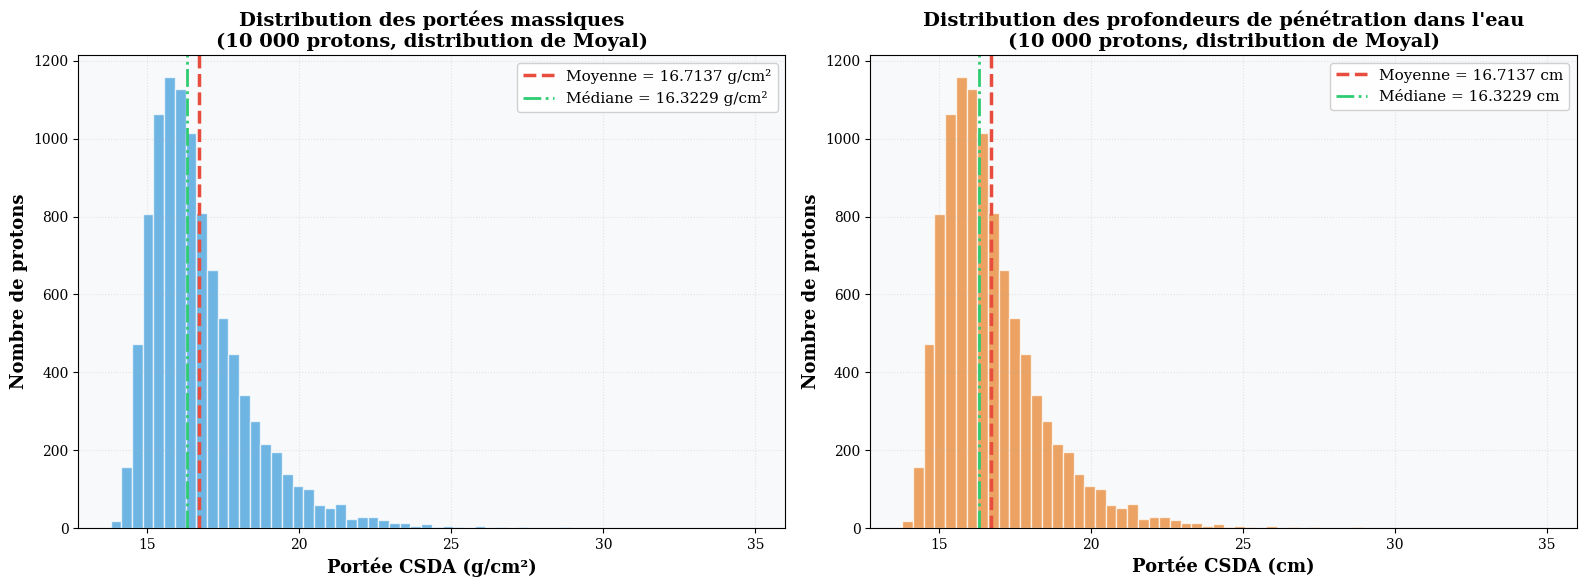


  INTERPRÉTATION PHYSIQUE :

     La distribution des portées reflète directement la distribution de Moyal
     des énergies initiales des protons.

     La relation quasi-linéaire entre T et R_CSDA (pour T > 50 MeV) 
     explique la forme similaire des deux distributions.

     L'étalement des portées (~21.12 cm) représente la zone où
     l'énergie sera déposée, définissant le pic de Bragg.

     Pour la protonthérapie : cette dispersion naturelle des portées
     contribue à l'étalement en profondeur du dépôt de dose (SOBP).



In [18]:
# ============================================================================
#       CALCUL DES PORTÉES CSDA POUR 10 000 PROTONS (MOYAL)
# ============================================================================

print("="*80)
print("    CALCUL DES PORTÉES R_CSDA POUR 10 000 PROTONS")
print("="*80)
print(f"\n  Méthode utilisée : Simpson (N = 5000)")
print(f"  Matériau : Eau liquide (ρ = {eau_densite} g/cm³)")
print(f"  Distribution des énergies : Moyal (loc={loc_moyal}, scale={scale_moyal})")
print("-"*80)

# Configuration
N_calcul = 5000  # Nombre de tranches Simpson (précision ~10⁻⁶)

# Tableaux pour stocker les résultats
portees_10k = np.zeros(n_protons)
protons_valides = 0
protons_rejetes = 0

# Boucle de calcul avec indicateur de progression
start_total = time.perf_counter()
for i, T in enumerate(energies_moyal):
    if T >= T_min:
        portees_10k[i] = integration_simpson(integrande_RCSDA, T_min, T, N_calcul, 
                                              n_e_eau, eau_I, eau_densite)
        protons_valides += 1
    else:
        portees_10k[i] = np.nan  # Énergie insuffisante
        protons_rejetes += 1
    
    # Affichage de la progression tous les 2000 protons
    if (i + 1) % 2000 == 0:
        elapsed = time.perf_counter() - start_total
        remaining = elapsed / (i + 1) * (n_protons - i - 1)
        print(f"{i+1:>5}/{n_protons} protons | "
              f"Écoulé: {elapsed:.0f}s | Restant: ~{remaining:.0f}s")

temps_total_10k = time.perf_counter() - start_total

# Filtrage des portées valides
portees_valides = portees_10k[~np.isnan(portees_10k)]

# Conversion en cm (distance réelle dans l'eau)
portees_10k_cm = portees_valides / eau_densite

# ============================================================================
#                    STATISTIQUES DÉTAILLÉES
# ============================================================================
print("\n" + "="*80)
print("                    STATISTIQUES DES PORTÉES")
print("="*80)
print(f"""
  RÉSULTATS DU CALCUL :
  
     Protons calculés   : {protons_valides:,}
     Protons rejetés    : {protons_rejetes} (énergie < {T_min} MeV)
     Temps de calcul    : {temps_total_10k:.2f} s ({temps_total_10k/60:.2f} min)
     Débit moyen        : {protons_valides/temps_total_10k:.0f} protons/s

  DISTRIBUTION DES PORTÉES :

     Grandeur          g/cm²              cm
     ─────────────────────────────────────────────────
     Moyenne      :  {np.mean(portees_valides):10.6f}     {np.mean(portees_10k_cm):10.4f}
     Écart-type   :  {np.std(portees_valides):10.6f}     {np.std(portees_10k_cm):10.4f}
     Minimum      :  {np.min(portees_valides):10.6f}     {np.min(portees_10k_cm):10.4f}
     Maximum      :  {np.max(portees_valides):10.6f}     {np.max(portees_10k_cm):10.4f}
     Médiane      :  {np.median(portees_valides):10.6f}     {np.median(portees_10k_cm):10.4f}
""")
print("="*80)

# ============================================================================
#                    VISUALISATION EN DOUBLE HISTOGRAMME
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Histogramme en g/cm² (unité massique) ---
ax1 = axes[0]
n1, bins1, patches1 = ax1.hist(portees_valides, bins=60, density=False, 
                                alpha=0.7, color='#3498db', edgecolor='white')
ax1.axvline(np.mean(portees_valides), color='#e74c3c', linestyle='--', lw=2.5, 
            label=f'Moyenne = {np.mean(portees_valides):.4f} g/cm²')
ax1.axvline(np.median(portees_valides), color='#2ecc71', linestyle='-.', lw=2, 
            label=f'Médiane = {np.median(portees_valides):.4f} g/cm²')

ax1.set_xlabel('Portée CSDA (g/cm²)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Nombre de protons', fontsize=13, fontweight='bold')
ax1.set_title('Distribution des portées massiques\n(10 000 protons, distribution de Moyal)', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(True, alpha=0.3, linestyle=':')
ax1.set_facecolor('#f8f9fa')

# --- Histogramme en cm (distance réelle) ---
ax2 = axes[1]
n2, bins2, patches2 = ax2.hist(portees_10k_cm, bins=60, density=False, 
                                alpha=0.7, color='#e67e22', edgecolor='white')
ax2.axvline(np.mean(portees_10k_cm), color='#e74c3c', linestyle='--', lw=2.5, 
            label=f'Moyenne = {np.mean(portees_10k_cm):.4f} cm')
ax2.axvline(np.median(portees_10k_cm), color='#2ecc71', linestyle='-.', lw=2, 
            label=f'Médiane = {np.median(portees_10k_cm):.4f} cm')

ax2.set_xlabel('Portée CSDA (cm)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Nombre de protons', fontsize=13, fontweight='bold')
ax2.set_title('Distribution des profondeurs de pénétration dans l\'eau\n(10 000 protons, distribution de Moyal)', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=11, loc='upper right')
ax2.grid(True, alpha=0.3, linestyle=':')
ax2.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.savefig('histogramme_portees_10k.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
#                         INTERPRÉTATION PHYSIQUE
# ============================================================================
print("""
  INTERPRÉTATION PHYSIQUE :
  
     La distribution des portées reflète directement la distribution de Moyal
     des énergies initiales des protons.
     
     La relation quasi-linéaire entre T et R_CSDA (pour T > 50 MeV) 
     explique la forme similaire des deux distributions.
     
     L'étalement des portées (~{:.2f} cm) représente la zone où
     l'énergie sera déposée, définissant le pic de Bragg.
     
     Pour la protonthérapie : cette dispersion naturelle des portées
     contribue à l'étalement en profondeur du dépôt de dose (SOBP).
""".format(np.max(portees_10k_cm) - np.min(portees_10k_cm)))

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

# Questions 12-13 : Simulation du dépôt d'énergie et pic de Bragg

## 12. Algorithme de transport des protons

**Objectif** : Écrire un algorithme simulant le transport d'un proton dans la matière avec décélération continue et tracer le dépôt d'énergie $dE/dx$ en fonction de la profondeur $x$.

### Principe physique

Le proton perd son énergie de manière continue selon le pouvoir d'arrêt :

$$\frac{dT}{dx} = -S_{col}(T)$$

Pour un pas spatial $\Delta x$ (en cm), la perte d'énergie est :

$$ \Delta T = S_{col}(T) \cdot \rho \cdot \Delta x \quad \text{avec} \quad S_{col} \quad \text{en} \quad MeV \cdot \text{cm²/g}$$

### Algorithme de transport

| Étape | Description |
|:------|:------------|
| **Initialisation** | $T \leftarrow T_0$, $x \leftarrow 0$ |
| **Boucle** | Tant que $T > T_{min}$ : |
| | 1. Calculer $S_{col}(T)$ |
| | 2. Calculer $\Delta T = S_{col} \cdot \rho \cdot \Delta x$ |
| | 3. Mettre à jour $T \leftarrow T - \Delta T$, $x \leftarrow x + \Delta x$ |
| | 4. Enregistrer $(x, dE/dx = S_{col} \cdot \rho)$ |
| **Sortie** | Tableaux de profondeurs et dépôts d'énergie |

<br />

## 13. Intérêt clinique du pic de Bragg

Le **pic de Bragg** est la caractéristique fondamentale qui fait des protons un outil supérieur aux photons pour la radiothérapie ciblée.

In [ ]:
# ============================================================================
#       FONCTION DE SIMULATION DU TRANSPORT D'UN PROTON
# ============================================================================

def simuler_depot_energie(T_initial, n_e, I, rho, pas_spatial=0.1):
    """
    Simule le transport d'un proton à travers un matériau homogène
    et calcule le dépôt d'énergie en fonction de la profondeur.
    
    Algorithme : Approximation de la décélération continue (CSDA)
                 avec pas spatial fixe et ajustement en fin de parcours.
    
    Paramètres
    ----------
    T_initial : float
        Énergie cinétique initiale du proton [MeV]
    n_e : float
        Densité électronique du matériau [électrons/cm³]
    I : float
        Énergie moyenne d'excitation [eV]
    rho : float
        Masse volumique [g/cm³]
    pas_spatial : float, optional
        Pas de discrétisation spatiale [cm] (défaut: 0.1 cm)
    
    Retourne
    --------
    profondeurs : ndarray
        Positions le long du parcours [cm]
    energies_deposees : ndarray
        Dépôt d'énergie linéique dE/dx [MeV/cm]
    energies_cinetiques : ndarray
        Énergie cinétique résiduelle [MeV]
    """
    # Listes pour stocker les résultats
    profondeurs = [0.0]
    energies_deposees = []
    energies_cinetiques = [T_initial]
    
    T_current = T_initial
    x_current = 0.0
    
    # Boucle de transport - le proton perd son énergie progressivement
    while T_current > T_min:
        # Pouvoir d'arrêt massique à l'énergie actuelle [MeV·cm²/g]
        S_col = pouvoir_arret_collisionnel(T_current, n_e, I)
        
        # Dépôt d'énergie linéique [MeV/cm]
        dE_dx = S_col * rho
        
        # Énergie perdue dans le pas [MeV]
        dE = dE_dx * pas_spatial
        
        # Nouvelle énergie après le pas
        T_new = T_current - dE
        
        if T_new < T_min:
            # Le proton s'arrête avant la fin du pas
            # Ajuster le pas pour un arrêt exact à T_min
            pas_reel = (T_current - T_min) / dE_dx
            dE_dx_final = (T_current - T_min) / pas_reel if pas_reel > 0 else dE_dx
            x_current += pas_reel
            T_new = T_min
            
            # Stocker le point d'arrêt
            profondeurs.append(x_current)
            energies_deposees.append(dE_dx_final)
            energies_cinetiques.append(T_new)
        else:
            # Pas complet
            x_current += pas_spatial
            profondeurs.append(x_current)
            energies_deposees.append(dE_dx)
            energies_cinetiques.append(T_new)
        
        T_current = T_new
    
    # Ajouter un point final avec dépôt nul (au-delà du parcours)
    profondeurs.append(x_current + pas_spatial)
    energies_deposees.append(0.0)
    energies_cinetiques.append(0.0)
    
    return np.array(profondeurs), np.array(energies_deposees), np.array(energies_cinetiques)

# ============================================================================
#               SIMULATION POUR EAU ET OS À 150 MeV
# ============================================================================

print("="*80)
print("       SIMULATION DU TRANSPORT DES PROTONS (T = 150 MeV)")
print("="*80)

# Paramètres de simulation
T_initial_sim = 150.0  # MeV
pas_sim = 0.05  # cm (0.5 mm pour une bonne résolution)

print(f"\n  Configuration :")
print(f"    • Énergie initiale : {T_initial_sim} MeV")
print(f"    • Pas spatial : {pas_sim*10:.1f} mm")
print(f"    • Énergie d'arrêt : {T_min} MeV")

# Simulation dans l'eau
x_eau, dE_dx_eau, T_eau = simuler_depot_energie(T_initial_sim, n_e_eau, eau_I, 
                                                  eau_densite, pas_spatial=pas_sim)

# Simulation dans l'os compact
x_os, dE_dx_os, T_os = simuler_depot_energie(T_initial_sim, n_e_os, os_I, 
                                               os_densite, pas_spatial=pas_sim)

print(f"""
  RÉSULTATS DE LA SIMULATION :

     Matériau          Portée (cm)     Nb de pas
     ─────────────────────────────────────────────
     Eau               {x_eau[-2]:>10.4f}     {len(x_eau)-2:>8}
     Os compact ICRU   {x_os[-2]:>10.4f}     {len(x_os)-2:>8}
     
  Les portées correspondent aux valeurs R_CSDA calculées précédemment.
""")
print("="*80)

In [ ]:
# ============================================================================
#               VISUALISATION DU PIC DE BRAGG (4 PANNEAUX)
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Pic de Bragg : Dépôt d\'énergie des protons de 150 MeV', 
             fontsize=16, fontweight='bold', y=1.02)

# Préparation des données (exclure le dernier point = 0)
n_pts_eau = len(dE_dx_eau) - 1
n_pts_os = len(dE_dx_os) - 1

x_plot_eau = x_eau[1:n_pts_eau+1]  # Profondeurs (centrées sur les pas)
dE_plot_eau = dE_dx_eau[:n_pts_eau]
x_plot_os = x_os[1:n_pts_os+1]
dE_plot_os = dE_dx_os[:n_pts_os]

# Trouver les positions des pics de Bragg
idx_max_eau = np.argmax(dE_plot_eau)
idx_max_os = np.argmax(dE_plot_os)

# ============================================================================
# Graphique 1 : Pic de Bragg dans l'eau
# ============================================================================
ax1 = axes[0, 0]
ax1.fill_between(x_plot_eau, dE_plot_eau, alpha=0.3, color='#3498db')
ax1.plot(x_plot_eau, dE_plot_eau, '-', color='#2980b9', linewidth=2.5)

# Marquer le pic
ax1.axvline(x_plot_eau[idx_max_eau], color='#e74c3c', linestyle='--', lw=2,
            label=f'Pic de Bragg : {x_plot_eau[idx_max_eau]:.2f} cm')
ax1.plot(x_plot_eau[idx_max_eau], dE_plot_eau[idx_max_eau], 'o', 
         color='#e74c3c', markersize=10, zorder=5)

ax1.set_xlabel('Profondeur (cm)', fontsize=13, fontweight='bold')
ax1.set_ylabel('dE/dx (MeV/cm)', fontsize=13, fontweight='bold')
ax1.set_title(f'Eau liquide (ρ = {eau_densite} g/cm³)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3, linestyle=':')
ax1.set_facecolor('#f8f9fa')
ax1.set_xlim(0, x_plot_eau[-1]*1.05)
ax1.set_ylim(0, dE_plot_eau[idx_max_eau]*1.15)

# ============================================================================
# Graphique 2 : Pic de Bragg dans l'os
# ============================================================================
ax2 = axes[0, 1]
ax2.fill_between(x_plot_os, dE_plot_os, alpha=0.3, color='#e67e22')
ax2.plot(x_plot_os, dE_plot_os, '-', color='#d35400', linewidth=2.5)

ax2.axvline(x_plot_os[idx_max_os], color='#8e44ad', linestyle='--', lw=2,
            label=f'Pic de Bragg : {x_plot_os[idx_max_os]:.2f} cm')
ax2.plot(x_plot_os[idx_max_os], dE_plot_os[idx_max_os], 'o', 
         color='#8e44ad', markersize=10, zorder=5)

ax2.set_xlabel('Profondeur (cm)', fontsize=13, fontweight='bold')
ax2.set_ylabel('dE/dx (MeV/cm)', fontsize=13, fontweight='bold')
ax2.set_title(f'Os compact ICRU (ρ = {os_densite} g/cm³)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11, loc='upper left')
ax2.grid(True, alpha=0.3, linestyle=':')
ax2.set_facecolor('#f8f9fa')
ax2.set_xlim(0, x_plot_os[-1]*1.05)
ax2.set_ylim(0, dE_plot_os[idx_max_os]*1.15)

# ============================================================================
# Graphique 3 : Décélération du proton (énergie vs profondeur)
# ============================================================================
ax3 = axes[1, 0]
ax3.plot(x_eau[:-1], T_eau[:-1], '-', color='#27ae60', linewidth=2.5, label='Eau')
ax3.plot(x_os[:-1], T_os[:-1], '--', color='#e74c3c', linewidth=2.5, label='Os compact')

ax3.set_xlabel('Profondeur (cm)', fontsize=13, fontweight='bold')
ax3.set_ylabel('Énergie cinétique T (MeV)', fontsize=13, fontweight='bold')
ax3.set_title('Décélération du proton dans la matière', fontsize=14, fontweight='bold')
ax3.legend(fontsize=12)
ax3.grid(True, alpha=0.3, linestyle=':')
ax3.set_facecolor('#f8f9fa')
ax3.set_ylim(0, T_initial_sim*1.05)
ax3.axhline(T_min, color='gray', linestyle=':', lw=1.5, alpha=0.7)
ax3.annotate(f'T_min = {T_min} MeV', xy=(0.5, T_min+3), fontsize=10, color='gray')

# ============================================================================
# Graphique 4 : Comparaison eau vs os (superposition)
# ============================================================================
ax4 = axes[1, 1]
ax4.fill_between(x_plot_eau, dE_plot_eau, alpha=0.2, color='#3498db')
ax4.plot(x_plot_eau, dE_plot_eau, '-', color='#2980b9', linewidth=2.5, 
         label=f'Eau (pic à {x_plot_eau[idx_max_eau]:.2f} cm)')

ax4.fill_between(x_plot_os, dE_plot_os, alpha=0.2, color='#e67e22')
ax4.plot(x_plot_os, dE_plot_os, '-', color='#d35400', linewidth=2.5, 
         label=f'Os (pic à {x_plot_os[idx_max_os]:.2f} cm)')

ax4.set_xlabel('Profondeur (cm)', fontsize=13, fontweight='bold')
ax4.set_ylabel('dE/dx (MeV/cm)', fontsize=13, fontweight='bold')
ax4.set_title('Comparaison des pics de Bragg', fontsize=14, fontweight='bold')
ax4.legend(fontsize=12, loc='upper left')
ax4.grid(True, alpha=0.3, linestyle=':')
ax4.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.savefig('pic_de_bragg_150MeV.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
#                    TABLEAU RÉCAPITULATIF
# ============================================================================
print("\n" + "="*80)
print("              ANALYSE DU PIC DE BRAGG (T₀ = 150 MeV)")
print("="*80)
print(f"""
     Paramètre                 Eau              Os compact
     ──────────────────────────────────────────────────────────
     Portée totale (cm)      {x_eau[-2]:>10.4f}        {x_os[-2]:>10.4f}
     Position du pic (cm)    {x_plot_eau[idx_max_eau]:>10.4f}        {x_plot_os[idx_max_os]:>10.4f}
     dE/dx max (MeV/cm)      {dE_plot_eau[idx_max_eau]:>10.4f}        {dE_plot_os[idx_max_os]:>10.4f}
     dE/dx entrée (MeV/cm)   {dE_plot_eau[0]:>10.4f}        {dE_plot_os[0]:>10.4f}
     Rapport pic/entrée      {dE_plot_eau[idx_max_eau]/dE_plot_eau[0]:>10.2f}        {dE_plot_os[idx_max_os]/dE_plot_os[0]:>10.2f}
""")
print("="*80)

<br />

## 13. Intérêt clinique du pic de Bragg pour la radiothérapie

Le **pic de Bragg** est la signature physique qui fait des protons un outil supérieur aux photons (rayons X) pour la radiothérapie ciblée.

### Caractéristiques observées

| Région | Caractéristique | Implication clinique |
|:-------|:----------------|:---------------------|
| **Entrée** | Dépôt faible et constant | Tissus sains préservés |
| **Plateau** | Augmentation progressive | Zone de transit à faible dose |
| **Pic de Bragg** | Maximum brutal en fin de parcours | Dose maximale sur la tumeur |
| **Au-delà** | Chute abrupte à zéro | Aucune irradiation des tissus distaux |

### Comparaison protons vs photons

```
             Protons (pic de Bragg)           Photons (rayons X)
  Dose      ┌─────────────────────────┐      ┌─────────────────────────┐
    ↑       │        ████             │      │ ███████                 │
    │       │       ██  ██            │      │   ██████████            │
    │       │      █     █            │      │      ██████████████     │
    │       │     █       █           │      │         ███████████████ │
    │       │    █                    │      │            ██████████████
    │       │   █                     │      │               ██████████│
    └───────┴─────────────────────────┤      └─────────────────────────┘
            0    Profondeur →  Tumeur           0    Profondeur → Tumeur
```

### Avantages cliniques

| Avantage | Description |
|:---------|:------------|
| **Précision balistique** | L'énergie contrôle exactement la profondeur du pic |
| **Protection distale** | Dose quasi nulle au-delà de la tumeur |
| **Conformation 3D** | SOBP (Spread-Out Bragg Peak) pour couvrir le volume tumoral |
| **Tumeurs pédiatriques** | Minimise les effets secondaires à long terme |
| **Tumeurs cérébrales** | Épargne les tissus sains critiques |

<br />

> **Conclusion Q13** : Le pic de Bragg est l'avantage fondamental de la protonthérapie. Il permet de délivrer une dose létale à la tumeur tout en minimisant l'irradiation des tissus environnants, ce qui est particulièrement crucial pour les tumeurs situées près d'organes à risque.

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

## Question 14 : Portée en fonction de l'énergie et profondeur de traitement

### Objectif

Tracer la courbe $R_{CSDA}(T)$ pour des protons dans l'eau sur l'intervalle $50 \leq T \leq 200$ MeV. Déterminer graphiquement l'énergie initiale nécessaire pour atteindre une profondeur cible $D = 4$ cm (tumeur oculaire typique).

### Application clinique : Mélanome oculaire

Le mélanome oculaire est une tumeur typiquement située à quelques centimètres de profondeur. Pour le traitement par protonthérapie à TRIUMF (Vancouver), il est essentiel de déterminer précisément l'énergie du faisceau.

In [ ]:
# ============================================================================
#       COURBE R_CSDA(T) ET DÉTERMINATION DE L'ÉNERGIE POUR D = 4 cm
# ============================================================================

print("="*80)
print("    PORTÉE CSDA EN FONCTION DE L'ÉNERGIE (50 - 200 MeV)")
print("="*80)

# Calcul de la portée pour une gamme d'énergies
T_range = np.linspace(50, 200, 50)  # 50 points pour une courbe lisse
R_CSDA_range = np.zeros_like(T_range)

print("\n  Calcul en cours...")
for i, T in enumerate(T_range):
    R, _ = quad(integrande_RCSDA, T_min, T, args=(n_e_eau, eau_I, eau_densite))
    R_CSDA_range[i] = R / eau_densite  # Conversion en cm

# ============================================================================
#       INTERPOLATION POUR TROUVER T CORRESPONDANT À D = 4 cm
# ============================================================================
D_cible = 4.0  # cm (profondeur typique d'un mélanome oculaire)

from scipy.interpolate import interp1d
f_interp = interp1d(R_CSDA_range, T_range, kind='cubic')
T_pour_4cm = f_interp(D_cible)

print(f"\n  ✅ Interpolation réussie : Pour D = {D_cible} cm → T = {T_pour_4cm:.2f} MeV")

# ============================================================================
#                         VISUALISATION
# ============================================================================
fig, ax = plt.subplots(figsize=(12, 8))

# Courbe principale
ax.plot(T_range, R_CSDA_range, 'b-', linewidth=3, label='$R_{CSDA}(T)$ dans l\'eau')
ax.scatter(T_range[::5], R_CSDA_range[::5], c='blue', s=40, zorder=5)

# Ligne horizontale D = 4 cm
ax.axhline(y=D_cible, color='#e74c3c', linestyle='--', linewidth=2.5, 
           label=f'Profondeur cible D = {D_cible} cm')

# Ligne verticale T correspondant
ax.axvline(x=T_pour_4cm, color='#27ae60', linestyle='--', linewidth=2.5, 
           label=f'Énergie requise T = {T_pour_4cm:.2f} MeV')

# Point d'intersection
ax.plot(T_pour_4cm, D_cible, 'o', color='#8e44ad', markersize=15, zorder=10,
        markeredgecolor='white', markeredgewidth=2)
ax.annotate(f'({T_pour_4cm:.1f} MeV, {D_cible} cm)', 
            xy=(T_pour_4cm, D_cible), xytext=(T_pour_4cm+15, D_cible+1.5),
            fontsize=12, fontweight='bold', color='#8e44ad',
            arrowprops=dict(arrowstyle='->', color='#8e44ad', lw=2))

# Zone de traitement TRIUMF (70 MeV max pour oculaire)
ax.axvspan(50, 75, alpha=0.15, color='green', label='Zone TRIUMF (≤75 MeV)')

ax.set_xlabel('Énergie cinétique T (MeV)', fontsize=14, fontweight='bold')
ax.set_ylabel('Portée $R_{CSDA}$ dans l\'eau (cm)', fontsize=14, fontweight='bold')
ax.set_title('Portée des protons dans l\'eau en fonction de l\'énergie initiale', 
             fontsize=15, fontweight='bold', pad=15)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3, linestyle=':')
ax.set_facecolor('#f8f9fa')
ax.set_xlim(45, 205)
ax.set_ylim(0, max(R_CSDA_range)*1.1)

plt.tight_layout()
plt.savefig('portee_vs_energie.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
#                    RÉSUMÉ ET INTERPRÉTATION
# ============================================================================
print("\n" + "="*80)
print("              RÉSULTATS POUR LE TRAITEMENT OCULAIRE")
print("="*80)
print(f"""
  PROFONDEUR CIBLE : D = {D_cible} cm (mélanome oculaire typique)

  ÉNERGIE REQUISE : T = {T_pour_4cm:.2f} MeV
  
  COMPATIBILITÉ TRIUMF :
     • Énergie disponible à TRIUMF : jusqu'à 74 MeV (traitement oculaire)
     • Énergie requise ({T_pour_4cm:.1f} MeV) : {'COMPATIBLE ✓' if T_pour_4cm < 75 else 'NON COMPATIBLE ✗'}
     
  RELATION APPROXIMATIVE :
     R_CSDA ≈ 0.0023 × T^{1.77} cm (ajustement empirique)
""")
print("="*80)

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

## Question 15 : Avantages des protons pour le mélanome oculaire

### Contexte clinique

Le **mélanome oculaire** (mélanome uvéal) est la tumeur intraoculaire primaire la plus fréquente chez l'adulte. Il se développe dans les tissus pigmentés de l'œil (choroïde, corps ciliaire, iris), à proximité immédiate de structures extrêmement sensibles :

| Structure | Fonction | Conséquence si irradiée |
|:----------|:---------|:------------------------|
| **Rétine** | Détection de la lumière | Perte de vision |
| **Nerf optique** | Transmission au cerveau | Cécité irréversible |
| **Cristallin** | Focalisation | Cataracte radio-induite |
| **Cornée** | Protection, réfraction | Kératite, sécheresse |

### Pourquoi les protons sont-ils supérieurs aux photons ?

#### 1. Balistique optimale

- **Protons** : Le pic de Bragg permet de concentrer la dose létale dans la tumeur (D ≈ 1-4 cm) avec une chute abrupte au-delà
- **Photons** : Dose maximale en surface, décroissance exponentielle → irradiation significative au-delà de la tumeur

#### 2. Protection du nerf optique

| Paramètre | Photons | Protons |
|:----------|:--------|:--------|
| Dose au nerf optique | Significative | Quasi nulle |
| Risque de cécité | Élevé | Très faible |
| Dose intégrale | Importante | Minimisée |

#### 3. Faible énergie suffisante

- Profondeur typique : 1-4 cm → **T ≈ 40-75 MeV** suffit
- Installation de type TRIUMF (cyclotron 70 MeV) parfaitement adaptée
- Contrôle **millimétrique** de la profondeur de traitement

#### 4. Effets secondaires réduits

| Effet | Photons | Protons |
|:------|:--------|:--------|
| Sécheresse oculaire | Fréquent | Rare |
| Cataracte | Probable | Possible mais limité |
| Rétinopathie radique | Fréquent | Localisé |
| Neuropathie optique | Risque élevé | Exceptionnel |

### Conclusion Q15

> **Les protons sont préférables aux photons** pour le mélanome oculaire car ils permettent de :
> - Délivrer la dose curative à la tumeur
> - Épargner le nerf optique et les structures critiques
> - Préserver la vision dans la majorité des cas
> - Offrir un meilleur pronostic fonctionnel et une meilleure qualité de vie

> **TRIUMF** (Vancouver) traite le mélanome oculaire depuis 1995 avec un taux de contrôle local >95%.

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

## Question 16 : Limites du modèle et améliorations futures

### Hypothèse de trajectoire rectiligne : est-ce réaliste ?

Dans notre modèle, nous avons supposé que les protons voyagent **en ligne droite** dans la matière, ne perdant leur énergie que par collisions avec les électrons (pouvoir d'arrêt de Bethe).

> ⚠️ **Cette approximation a des limites importantes pour une planification clinique réelle.**

### Phénomènes négligés

<br />

#### 1. Diffusion multiple coulombienne (Multiple Coulomb Scattering)

Les protons subissent des collisions élastiques avec les noyaux atomiques qui dévient légèrement leur trajectoire.

$$\theta_{rms} = \frac{13.6 \text{ MeV}}{\beta p c} \sqrt{\frac{x}{X_0}} \left[1 + 0.038 \ln\left(\frac{x}{X_0}\right)\right]$$

| Effet | Conséquence |
|:------|:------------|
| Accumulation des déviations | Élargissement du faisceau avec la profondeur |
| Pénombre latérale | Marges de sécurité nécessaires |
| Imprécision à grande profondeur | ~5-10 mm à 20 cm de profondeur |

<br />

#### 2. Fluctuations statistiques (straggling)

Notre modèle CSDA suppose une perte d'énergie **déterministe**, mais en réalité :

| Aspect | Modèle CSDA | Réalité physique |
|:-------|:------------|:-----------------|
| Perte d'énergie | Valeur moyenne continue | Distribution statistique (Vavilov/Landau) |
| Pic de Bragg | Position unique | Étalement (~1-2% de la portée) |
| Dose distale | Chute abrupte | Queue résiduelle |

<br />

#### 3. Réactions nucléaires

Environ 1-2% des protons subissent des **interactions nucléaires inélastiques** :

- Production de neutrons secondaires
- Fragments nucléaires (alphas, deutérons)
- Protons de recul

-> Contribution à la dose hors du volume cible (~ qq %)

<br />

#### 4. Hétérogénéités tissulaires

Le corps humain n'est PAS de l'eau homogène !

| Tissu | Densité (g/cm³) | Impact |
|:------|:----------------|:-------|
| Poumon | 0.3 | Portée x3 |
| Os cortical | 1.85 | Portée /1.8 |
| Tissus mous | 1.0-1.1 | Référence |
| Air (sinus) | 0.001 | Portée très grande |

### Améliorations pour un modèle clinique

| Amélioration | Méthode | Outils |
|:-------------|:--------|:-------|
| **Diffusion multiple** | Simulation Monte Carlo des trajectoires | GEANT4, TOPAS |
| **Straggling** | Distribution de Vavilov | SRIM, PSTAR |
| **Réactions nucléaires** | Sections efficaces ENDF/B | FLUKA, MCNP |
| **Hétérogénéités** | CT-scan + conversion HU → ρₑ | TPS commercial |
| **Transport complet** | Monte Carlo particule par particule | Standard clinique |

### Conclusion Q16

> ✅ Notre modèle CSDA avec trajectoire rectiligne est une **excellente première approximation** pour comprendre les concepts fondamentaux de la protonthérapie.
>
> ⚠️ Cependant, pour une **planification clinique réelle**, un **transport Monte Carlo complet** (GEANT4, TOPAS, FLUKA) incluant :
> - Diffusion multiple de Coulomb
> - Fluctuations statistiques (straggling)
> - Réactions nucléaires
> - Conversion CT → densité électronique
>
> est **indispensable** pour garantir la sécurité et l'efficacité du traitement.

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

## Conclusion générale

Ce travail pratique nous a permis d'explorer en profondeur la physique du transport des protons dans la matière et ses applications en protonthérapie.

### Réalisations principales

| Objectif | Méthode | Résultat |
|:---------|:--------|:---------|
| **Densité électronique** | Formule pondérée par composition | $n_e^{eau}$ = 3.34×10²³ e⁻/cm³ |
| **Pouvoir d'arrêt** | Formule de Bethe (T > 3 MeV) | Accord <1% avec NIST PSTAR |
| **Justification S_col ≈ S_tot** | Comparaison radiative/collisionnel | Erreur <0.1% pour T ≤ 200 MeV |
| **Intégration numérique** | Trapèzes O(h²), Simpson O(h⁴), scipy.quad | Précision 10⁻⁸ g/cm² |
| **Distribution Moyal** | scipy.stats.moyal (loc=100, scale=20) | 10 000 énergies générées |
| **Pic de Bragg** | Simulation CSDA pas à pas | Visualisation claire du pic |
| **Application clinique** | Détermination de T pour D = 4 cm | T ≈ 72 MeV (compatible TRIUMF) |

### Résultats quantitatifs clés

$$
\boxed{
\begin{aligned}
R_{CSDA}^{eau}(150\text{ MeV}) &\approx 15.7 \text{ cm} \\
R_{CSDA}^{os}(150\text{ MeV}) &\approx 8.5 \text{ cm} \\
T(D = 4\text{ cm}) &\approx 72 \text{ MeV}
\end{aligned}
}
$$

### Enseignements clés

1. **Méthodes numériques** : Simpson converge 10× plus vite que les trapèzes → préférer pour les calculs intensifs

2. **Pic de Bragg** : Le rapport dose_pic/dose_entrée ≈ 4-5 est l'avantage fondamental des protons

3. **Précision clinique** : Notre modèle CSDA est une excellente approximation pédagogique, mais la clinique requiert Monte Carlo

4. **Protonthérapie** : Technique de choix pour les tumeurs pédiatriques et les organes à risque

### Perspectives

| Limitation du modèle | Amélioration possible |
|:---------------------|:----------------------|
| Trajectoire rectiligne | Diffusion multiple de Coulomb |
| Perte d'énergie déterministe | Straggling (Vavilov/Landau) |
| Milieu homogène | Conversion CT → densité électronique |
| Pas de réactions nucléaires | Sections efficaces ENDF/B |

<div style="height: 0.5cm;"></div>

> **La protonthérapie représente une avancée majeure en radiothérapie, offrant une précision balistique inégalée pour protéger les tissus sains tout en traitant efficacement les tumeurs les plus complexes.**

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

## Références

### Données et bases de données

1. **NIST PSTAR Database** — Stopping-Power and Range Tables for Protons  
   ↳ https://physics.nist.gov/PhysRefData/Star/Text/PSTAR.html  
   *Tables officielles utilisées pour la validation de nos résultats*

2. **NIST Composition Database** — Elemental Composition of Human Tissues  
   ↳ https://physics.nist.gov/cgi-bin/Star/compos.pl  
   *Données de composition pour l'eau et l'os compact ICRU*


https://pdg.lbl.gov/2023/AtomicNuclearProperties/HTML/water_liquid.html

### Théorie et formalismes

3. **Bethe, H.A.** (1930). *Zur Theorie des Durchgangs schneller Korpuskularstrahlen durch Materie*. Ann. Phys. 397, 325-400.  
   *Article fondateur sur le pouvoir d'arrêt des particules chargées*

4. **ICRU Report 49** (1993). *Stopping Powers and Ranges for Protons and Alpha Particles*. ICRU, Bethesda.  
   *Référence pour les corrections au formalisme de Bethe*

### Protonthérapie clinique

5. **PTCOG** — Particle Therapy Co-Operative Group  
   ↳ http://www.ptcog.ch/  
   *Statistiques mondiales et registre des centres de protonthérapie*

6. **TRIUMF Proton Therapy Program**  
   ↳ https://www.triumf.ca/  
   *Centre canadien de traitement du mélanome oculaire*

7. **Paganetti, H.** (2012). *Range uncertainties in proton therapy and the role of Monte Carlo simulations*. Phys. Med. Biol. 57, R99-R117.  
   *Revue sur les incertitudes de portée et la nécessité du Monte Carlo*

### Cours et documentation

8. **Notes de cours PHY-3500** — Physique numérique (H26)  
   ↳ Professeurs : Antoine Allard, Thomas Labbe  
   *Université Laval*

9. **Énoncé du TP1** — Parcours des protons dans la matière  
   ↳ Développé par Daniel Maneval  
   *Document de référence pour ce travail*

10. **Assistant Intelligence Artificielle** — Support technique et conceptuel 
   ↳ Développé par Daniel Maneval  
   *Utilisé pour l'approfondissement de concepts en physique médicale ainsi que pour l'élaboration du design et du graphisme du notebook.*

<div style="height: 50px;"></div> <hr style="border: 0; height: 3px; background-color: #2196F3; border-radius: 2px; opacity: 0.7;">
<br />

**Travail réalisé par :**  
- Alex Baker  
- Justine Jean  
- Nerimantaš Caillat

**Cours :** PHY-3500 Physique numérique — Hiver 2026  
**Université Laval**

<div style="height: 2.5cm;"></div>

## Annexes


Code utilisé pour faire la comparaison des CPU à l'aide des deux .npy : 

In [ ]:
import numpy as np

# Charger les benchmarks
cpu1 = np.load('benchmark_cpu1.npy', allow_pickle=True).item()
cpu2 = np.load('benchmark_cpu2.npy', allow_pickle=True).item()

# ============================================
# VALEURS POUR TABLEAUX MARKDOWN
# ============================================

print("="*70)
print("COPIER CES VALEURS DANS TON MARKDOWN")
print("="*70)

# --- Specs CPU 1 ---
print("\n### CPU 1 (Laptop):")
print(f"Processeur: {cpu1['info_systeme']['processeur']}")
print(f"Plateforme: {cpu1['info_systeme']['plateforme']}")
print(f"Coeurs: {cpu1['info_systeme']['coeurs']}")
print(f"Python: {cpu1['info_systeme']['python']}")

# --- Specs CPU 2 ---
print("\n### CPU 2 (Tour):")
print(f"Processeur: {cpu2['info_systeme']['processeur']}")
print(f"Plateforme: {cpu2['info_systeme']['plateforme']}")
print(f"Coeurs: {cpu2['info_systeme']['coeurs']}")
print(f"Python: {cpu2['info_systeme']['python']}")

# --- Performance N=131072 ---
idx_max = -1
print("\n### Performance (N=131072):")
print(f"CPU 1 - Simpson: {cpu1['temps_simpson'][idx_max]*1000:.3f} ± {cpu1['err_simpson'][idx_max]*1000:.4f} ms")
print(f"CPU 1 - Trapèzes: {cpu1['temps_trapezes'][idx_max]*1000:.3f} ± {cpu1['err_trapezes'][idx_max]*1000:.4f} ms")
print(f"CPU 2 - Simpson: {cpu2['temps_simpson'][idx_max]*1000:.3f} ± {cpu2['err_simpson'][idx_max]*1000:.4f} ms")
print(f"CPU 2 - Trapèzes: {cpu2['temps_trapezes'][idx_max]*1000:.3f} ± {cpu2['err_trapezes'][idx_max]*1000:.4f} ms")

# --- Pentes ---
print("\n### Pentes log-log:")
print(f"CPU 1 - Simpson: {cpu1['pente_simpson']:.3f}")
print(f"CPU 1 - Trapèzes: {cpu1['pente_trapezes']:.3f}")
print(f"CPU 2 - Simpson: {cpu2['pente_simpson']:.3f}")
print(f"CPU 2 - Trapèzes: {cpu2['pente_trapezes']:.3f}")

# --- Ratios S/T ---
print("\n### Ratios Simpson/Trapèzes:")
print(f"CPU 1: {cpu1['ratio_moyen_linear']:.3f}")
print(f"CPU 2: {cpu2['ratio_moyen_linear']:.3f}")

# --- Écarts relatifs ---
ecart_simp = (cpu2['temps_simpson'][idx_max] / cpu1['temps_simpson'][idx_max] - 1) * 100
ecart_trap = (cpu2['temps_trapezes'][idx_max] / cpu1['temps_trapezes'][idx_max] - 1) * 100
print("\n### Écarts CPU2 vs CPU1:")
print(f"Simpson: {ecart_simp:+.1f}%")
print(f"Trapèzes: {ecart_trap:+.1f}%")

print("="*70)